## MERCARI PRICE SUGGESTION CHALLENGE

### BRIEF ABOUT THE COMPANY:-

<b> Mercari Inc. </b> is a Japanese ecommerce company founded in <b> February 2013 </b> by Japanese Serial Entrepreneur <b> Shintaro Yamada</b>. When founded, it was named <b> Kuzoh Inc.</b>. It is currently operating in Japan, UK and the United States. Mercari app was launched for IOS and mobile devices in <b> July, 2013 </b>. It has grown up since then to become Japan's largest community-powered marketplace with over <b> JPY 10 billion </b> in transactions carried out on the platform each month. Mercari has the largest market share among the country's one of many community marketplace apps with <b> 94% </b> of the Japanese users using Mercari. Features such as <b> Mercari Channel (live streaming e-commerce) </b> and the <b> Mercari NOW service </b>, which allows users to instantly receive cash for their items, have contributed to the app's widespread success. Mercari expanded to the United States in <b> 2014 </b> and the United Kingdom in <b> 2016 </b>. The Mercari app has been downloaded over 100 million times worldwide (as of 16 December 2017).

### BUSINESS PROBLEM DEFINITION:-

We have to predict the prices of the products which are being put up on the Mercari App by sellers. It is pretty tough to actually predict the prices of the products as sellers are free to put up anything on the Mercari's marketplace. If the prices of the items below their actual price, then the sellers would be at loss while if we predict the prices of the items above their original price, then the customers would move out.

### BRIEF ABOUT THE DATASET:-

The dataset given to us consists of <b> 1,482,535 </b> products along with their prices and descriptions. The product descriptions include :-

1) <b> product_id </b> - The unique id of the product.
    
2) <b> name </b> - The name of the product/item.
    
3) <b> item_condition_id </b> -  The condition of the product provided by the seller.
    
3) <b> category_name </b> - the name of the category of the product i.e. the industry to which the product belongs to.
    
4) <b> brand_name </b> - the brand of the product.
    
5) <b> price </b> - the item's final bidding price
    
6) <b> shipping </b> - A variable denoting whether the shipping charge is to be paid by the seller or not.
    
7) <b> item_Description </b> - The full description of the product giving the details about the priduct regarding it's quality.

### Numerical Features:-

1) <b> price </b> - This is the variable which needs to be predicted for the various products which are put up on the Mercari's marketplace.

### Categorical Features:-

1) <b> name </b>
    
2) <b> item_condition_id </b>

3) <b> name </b>

4) <b> brand_name </b>

5) <b> category_name </b> - There are 3 categories separated by a '/' in this text. The first one is the main category, the rest of the 2 are sub-categories belonging to the main category.

6) <b> item_Description </b>

### DATASET LINK :-

The dataset can be found at https://www.kaggle.com/c/mercari-price-suggestion-challenge/data.

The dataset given is in the form of a tab separated values(.tsv) file which are train.tsv and test.tsv. The training data is in the form of .7z file named <b> train.tsv.7z </b> which in compressed format is of the size of 74.3 MB which when uncompressed goes up to the size of 329 MB. The test data is in the form of .7z file named <b> test.tsv.7z </b> which in compressed format is of the size of 33.97 MB. The uncompressed size of the test data is of the order of 150 MB.

### ML PROBLEM:-

The given business problem can be mapped to a supervised learning problem of regression where our target variable is price which is a continuous variable and the input features are the rest of the features which is a combination of categorical and numerical features.

### BUSINESS OBJECTIVES/CONSTRAINTS:-

The constraint of the Business Objective is Interpretability. There has to be some interpretability in the result which should indicate why the price of a particular item is high or low. Feature importances of the model's input variables should be able to provide a reasonable picture of the same.

### ERROR METRIC:-

The error metric or the performance metric of the problem for assessing the performance of the ML algorithm is <b> Root Mean Squared Logarithmic Error </b> popularly abbreviated as <b> RMSLE </b>. 

Mathematically, RMSLE is given by :-

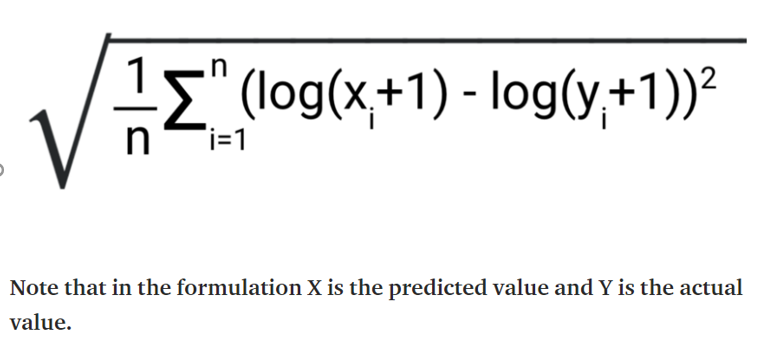

The equation clearly shows that the Root Mean Squared Logarithmic Error is given by average squared difference in the logarithm of the predicted price and the actual price (1 added to the price just to avoid the log 0 error).

1) The main advantage of this error metric over RMSE is it's robustness to outliers. The presence of high-end outliers in the dataset doesn't explode the error term as we are taking the logarithm of the predicted and actual price. If we don't want to penalize the high end outliers in a problem, then we should go for RMSLE as compared to RMSE. 

2) The second advantage of this error metric over RMSE is that it penalizes more the underestimation of the actual value than the overestimation of the actual value.

3) The third advantage of this error metric over RMSE is that it considers the relative error between the actual and the predicted value and the scale of the error is not significant when compared to RMSE in which the scale of the error matters.


### LOADING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import re
import nltk
import os
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD
#from sklearn.manifold import TSNE
#from sklearn.cluster import MiniBatchKMeans

### IMPORTING THE DATA

In [2]:
# Reading the data
mercari_pricedata = pd.read_csv("train.tsv", sep = '\t')

'''Getting the first five rows of the data'''
mercari_pricedata.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
'''Getting the columns of the data'''

print("The columns of the data are: ")

mercari_pricedata.columns

The columns of the data are: 


Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [4]:
'''Checking the shape of the data'''

print("There are {} products with {} number of attributes".format(mercari_pricedata.shape[0],mercari_pricedata.shape[1]))

There are 1482535 products with 8 number of attributes


In [5]:
'''Getting the statistics of the numerical data of the dataset'''

print("The count, mean, minimum, maximum values, 25th percentile, 50th percentile and 75th percentile of the numerical columns are : ")
mercari_pricedata.describe()

The count, mean, minimum, maximum values, 25th percentile, 50th percentile and 75th percentile of the numerical columns are : 


,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


#### OBSERVATIONS:-

The price variable's distribution is heavily skewed towards left i.e. there are many products which are low on price. We can see that 75 percent of the products price are within 29 dollars whereas the last 25 percent of the remaining products are between 29 dollars and 2,009 dollars which is very less in density when we compare the range of the first 75 percent products is within 0 dollar and 29 dollars.

### EXPLORATORY DATA ANALYSIS:-

The first stage to approach the problem is to know the dataset which has been provided to us. In order to explore what is the internal relations between the input variables, we need to explore the data first. Let's begin the exploration of the data.

#### Checking the number of unique categories and brands

In [6]:
'''Checking the number of unique categories'''

print("The number of unique categories in the data is {} ".format(mercari_pricedata.category_name.nunique()))

The number of unique categories in the data is 1287 


In [7]:
'''Checking the number of unique brands'''

print("The number of unique brands in the data is {} ".format(mercari_pricedata.brand_name.nunique()))

The number of unique brands in the data is 4809 


#### OBSERVATIONS:-

1) There are 1287 unique categories in the given data.

2) There are 4809 unique brands in the given data.

#### Checking the null values for each of the columns

In [8]:
''' Checking the null values in the name column of the data'''

print("The total products with null values in the product name column is {} ".format(sum(mercari_pricedata.name.isnull())))

The total products with null values in the product name column is 0 


In [9]:
''' Checking the null values in the item_condition_id column of the data'''

print("The total products with null values in the item_condition_id column is {} ".format(sum(mercari_pricedata.item_condition_id.isnull())))

The total products with null values in the item_condition_id column is 0 


In [10]:
''' Checking the null values in the category_name column of the data'''

print("The total products with null values in the category_name column is {} ".format(sum(mercari_pricedata.category_name.isnull())))

The total products with null values in the category_name column is 6327 


In [11]:
'''Checking the null values in brand_name column of the data'''

print("The total products with null values in the brand_name column is {} ".format(sum(mercari_pricedata.brand_name.isnull())))

The total products with null values in the brand_name column is 632682 


In [12]:
'''Checking the null values in price column of the data'''

print("The total products with null values in the price column is {} ".format(sum(mercari_pricedata.price.isnull())))

The total products with null values in the price column is 0 


In [13]:
'''Checking the null values in shipping column of the data'''

print("The total products with null values in the shipping column is {} ".format(sum(mercari_pricedata.shipping.isnull())))

The total products with null values in the shipping column is 0 


In [14]:
'''Checking the null values in the text_description column of the data'''

print("The total products with null values in the item_description column is {} ".format(sum(mercari_pricedata.item_description.isnull())))

The total products with null values in the item_description column is 4 


#### OBSERVATIONS:-

1) There are 6,327 products with no category name in the training data.

2) There are 6,32,682 products with no brand name in the training data.

3) There are 4 products with no item description in the training data.

#### CHECKING THE DISTRIBUTION OF THE PRICE VARIABLE IN THE TRAINING DATA

Text(0.5, 1.0, 'Histogram of the variable price')

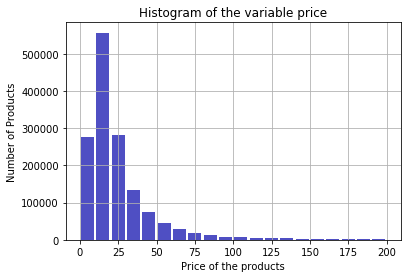

In [15]:
#np.histogram(mercari_pricedata.price, bins = 25)
# Reference :- https://realpython.com/python-histograms/
# 2nd Reference :- https://medium.com/analytics-vidhya/mercari-price-suggestion-challenge-a-machine-learning-regression-case-study-9d776d5293a0

plt.hist(mercari_pricedata.price, bins = 20,range = [0,200], color = '#0504aa', alpha = 0.7, rwidth = 0.85)
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the variable price")

Text(0.5, 1.0, 'Histogram of the log of price variable')

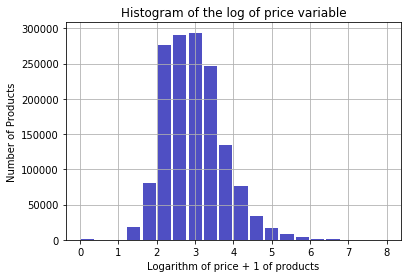

In [16]:
'''Converting the price variable into log of price + 1 and then checking the distribution'''

#Reference :- https://medium.com/analytics-vidhya/mercari-price-suggestion-challenge-a-machine-learning-regression-case-study-9d776d5293a0

plt.hist(np.log(mercari_pricedata.price + 1), bins = 20, range = [0,8], color = '#0504aa', alpha = 0.7, rwidth = 0.85)
plt.grid()
plt.xlabel("Logarithm of price + 1 of products")
plt.ylabel("Number of Products")
plt.title("Histogram of the log of price variable")

#### OBSERVATIONS:-

1) As explained from the quantile values of the price variable, we see that the histogram of the price variable over all the products is heavily skewed towards left. In other words, we can say that there are more products with lower price than with higher price. 

2) While predicting the price variable, we would give more importance to predict price of those items which are low on price because they are more in numbers than the high priced items. So, in order to achieve this, we would use <b> RMSLE </b> as our error metric instead of <b> RMSE </b> as then we would have a very high error metric for wrong predictions on higher priced items which we don't want. 

3) Hence, we use RMSLE and for that we convert the variable price into log scale after adding 1 to it. 

#### CHECKING THE DISTRIBUTION OF PRICE VARIABLE FOR THE PRODUCTS WITH SHIPPING PAID BY THE SELLER VERSUS FOR THOSE PRODUCTS WITH SHIPPING PAID BY THE BUYER

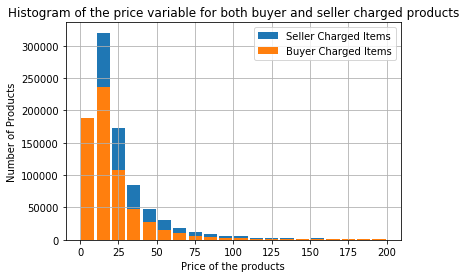

In [17]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = mercari_pricedata[mercari_pricedata['shipping'] == 0].price.values
buyer_charged = mercari_pricedata[mercari_pricedata['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=20, range = [0,200], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=20, range=[0,200], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products")
plt.legend()

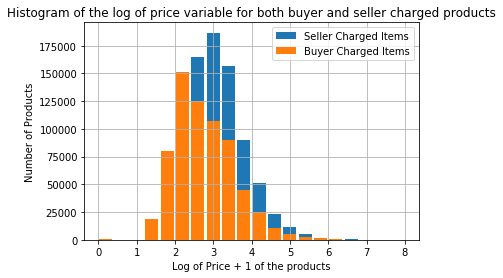

In [18]:
# Getting the array of the log of price of the seller charged and buyer charged items
seller_charged_log = np.log(mercari_pricedata[mercari_pricedata['shipping'] == 0].price+1).values
buyer_charged_log = np.log(mercari_pricedata[mercari_pricedata['shipping'] == 1].price+1).values

#Reference :- https://medium.com/analytics-vidhya/mercari-price-suggestion-challenge-a-machine-learning-regression-case-study-9d776d5293a0
# Plotting the histograms for the log of price of the seller charged items and buyer charged items
plt.hist(seller_charged_log, bins=20, range = [0,8], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged_log, bins=20, range=[0,8], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Log of Price + 1 of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the log of price variable for both buyer and seller charged products")
plt.legend()

#### OBSERVATIONS:-

1) The histogram of the log price of the products of the buyer charged items and seller charged items shows that there are more lower priced products for which the shipping is paid by the buyer than for which the shipping is paid by the seller.

2) The above histogram also shows that there are more higher priced products for which shipping is paid by the seller than for which the shiiping is paid by the buyer.

3) We can also say that the distribution plot would reveal that the price variable cannot be separated perfectly with the shipping variable. Let us check the distribution plot for the logarithm of the price for buyer and seller charged items.

#### DISTRIBUTION PLOT FOR THE LOGARITHM OF THE PRICE FOR BUYER AND SELLER CHARGE ITEMS

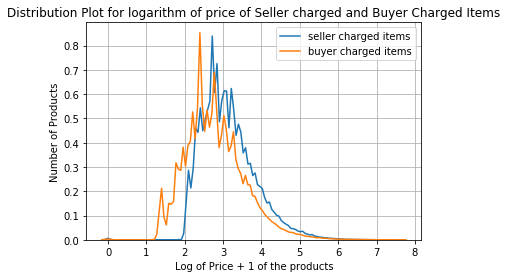

In [19]:
#Plotting the distribution plot
sns.distplot(seller_charged_log,hist = False,label='seller charged items')
sns.distplot(buyer_charged_log,hist = False,label='buyer charged items')
plt.grid()
plt.legend()
plt.xlabel("Log of Price + 1 of the products")
plt.ylabel("Number of Products")
plt.title("Distribution Plot for logarithm of price of Seller charged and Buyer Charged Items")
plt.show()

#### OBSERVATION:-

From the above distribution plot, we can clearly see that the shipping variable is not able to separate out the prices of the products perfectly. In other words, there are products with the same price for which the shipping is paid by the buyer and also by the seller.

#### CREATING THE LOG OF PRICE VARIABLE IN THE DATA

In [20]:
'''Transforming the price to logarithm of the price+1'''

mercari_pricedata['log_price'] = np.log(mercari_pricedata.price + 1)

In [21]:
# Checking the head of the dataset
print("The first five rows of the data are: ")
mercari_pricedata.head()

The first five rows of the data are: 


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662


#### CHECKING THE COUNT OF THE PRODUCTS FOR THE TOP 20 CATEGORIES ALONG WITH THE BAR PLOT WITH THE COUNT OF PRODUCTS ON THE HORIZONTAL AXIS AND THE CATEGORIES ON THE Y-AXIS

In [22]:
# Getting the category names from the value_counts series

mercari_pricedata.category_name.value_counts()[0:20].index

Index(['Women/Athletic Apparel/Pants, Tights, Leggings',
       'Women/Tops & Blouses/T-Shirts', 'Beauty/Makeup/Face',
       'Beauty/Makeup/Lips', 'Electronics/Video Games & Consoles/Games',
       'Beauty/Makeup/Eyes',
       'Electronics/Cell Phones & Accessories/Cases, Covers & Skins',
       'Women/Underwear/Bras', 'Women/Tops & Blouses/Blouse',
       'Women/Tops & Blouses/Tank, Cami', 'Women/Dresses/Above Knee, Mini',
       'Women/Jewelry/Necklaces', 'Women/Athletic Apparel/Shorts',
       'Beauty/Makeup/Makeup Palettes', 'Women/Shoes/Boots',
       'Beauty/Fragrance/Women', 'Beauty/Skin Care/Face',
       'Women/Women's Handbags/Shoulder Bag', 'Men/Tops/T-shirts',
       'Women/Dresses/Knee-Length'],
      dtype='object')

In [23]:
# Getting the indices for the topmost categories by sorting the value counts series
indices = np.argsort(mercari_pricedata.category_name.value_counts())[-20:]

# Getting the series according to the indices
mercari_pricedata.category_name.value_counts()[indices]

Women/Dresses/Knee-Length                                      14770
Men/Tops/T-shirts                                              15108
Women/Women's Handbags/Shoulder Bag                            15328
Beauty/Skin Care/Face                                          15836
Beauty/Fragrance/Women                                         18628
Women/Shoes/Boots                                              18864
Beauty/Makeup/Makeup Palettes                                  19103
Women/Athletic Apparel/Shorts                                  19528
Women/Jewelry/Necklaces                                        19758
Women/Dresses/Above Knee, Mini                                 20082
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Underwear/Bras                                           21274
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Beauty/Makeup/Eyes                

Text(0.5, 0, 'Number of Products')

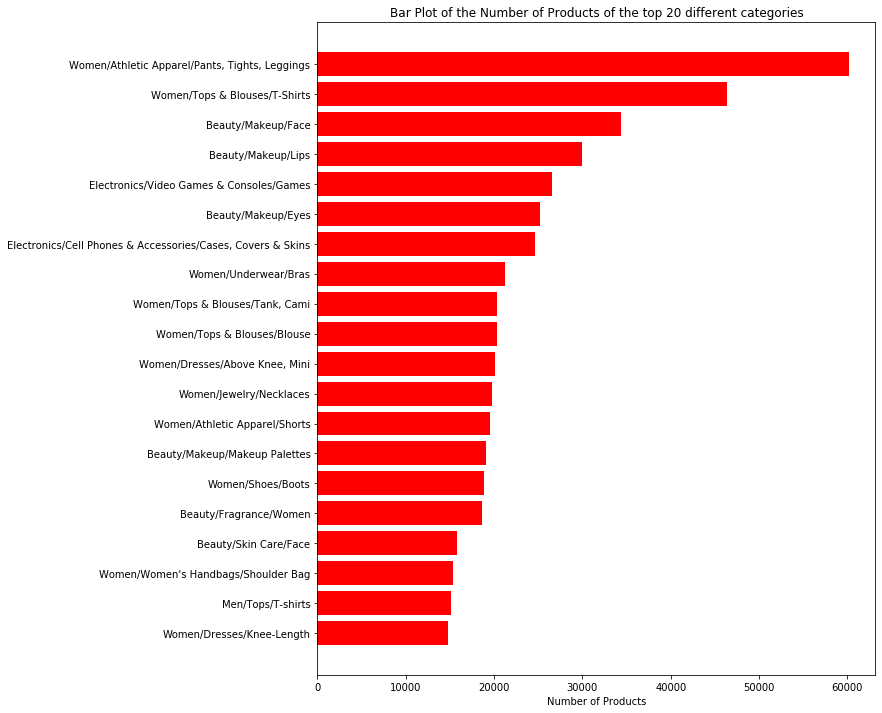

In [24]:
# Plotting the horizontal bar plots with the category names on the y-axis and number of products on the x-axis
plt.figure(figsize = (10,12))
plt.title("Bar Plot of the Number of Products of the top 20 different categories")
# The array of number of categories as the first argument and the frequency counts as the second argument.
plt.barh(range(len(indices)),mercari_pricedata.category_name.value_counts()[indices], color = 'r')
# The array of number of categories as the first argument and names of the categories on the y-axis as the second argument to be provided.
plt.yticks(range(len(indices)),[mercari_pricedata.category_name.value_counts().index[i] for i in indices])
plt.xlabel("Number of Products")

#### IMPUTATION OF THE BRAND NAMES WITH NULL VALUES

1) There are more than 0.6 million products with no brand names

2) We would impute the brand names by checking whether the product name has the brand name from the unique list of available brands.

3) In this way, we would be able to impute as many brands as possible.

In [25]:
# Defining the unique list of brands
unique_brand_set = set(mercari_pricedata.brand_name)

# Checking the unique list of brands
print("The unique set of brands present are : ")
print(unique_brand_set)

The unique set of brands present are : 
{nan, 'Ninety', 'Stone Fox Swim', 'Clairol', 'In Bloom by Jonquil', 'Apt. 9', 'ARCONA', 'Rave', 'I LOVE NEW YORK by Bond No. 9', 'Coldwater Creek', 'Cuisinart', 'USAF', 'Eden', 'United Colors Of Benetton', 'Cheap Monday', 'Babolat', 'On-Stage Stands', 'Gilly Hicks', "Hill's Ideal Balance", 'Tony Hawk', 'Dove', 'Playmobil', 'Curtis Computer Products', 'Neiman Marcus', 'GEAR FOR SPORTS', 'Paprika', 'CIOR', 'Tervis', 'LaMarque', 'Ron Jon', 'Calgon', 'Ralph Lauren Collection', 'Savane', 'Catherine Catherine Malandrino', 'Anthropologie', 'Alice + Olivia', 'Ironman', 'Steve Madden', 'Jennifer Lopez', 'Jag Jeans', 'Vaneli', 'Perfection', 'Dark Horse', 'Lulu Guinness', 'CAbi', 'Club Room', 'Janie and Jack', 'Riders', 'Sunbeam', "Arc'teryx", 'Hybrid', 'Shoe Dazzle', 'Becca Cosmetics', 'Nespresso', 'Earth Mama Angel Baby', 'It Figures', 'Lennie for Nina Leonard', 'Madden Girl', 'NYX Cosmetics', 'One Clothing', 'Boy + Girl', 'Pixi', 'DL', 'Garfield & Marks'

In [26]:
unique_train_brands = pd.DataFrame(unique_brand_set)

unique_train_brands.columns = ['brands']

# Checking the first five rows of the dataframe unique_train_brands
unique_train_brands.head()

,brands
0,NaN
1,Ninety
2,Stone Fox Swim
3,Clairol
4,In Bloom by Jonquil


In [27]:
# Exporting the dataframe of training brands to the disk

unique_train_brands.to_csv("Model Deployment/training_brands.csv", index = False)

In [33]:
# Checking the maximum length of the brand_name in the unique_brand_set

list_of_unique_brands = list(unique_brand_set)
maxlen = 0
i = 0

for brand_name in list_of_unique_brands:
    if isinstance(brand_name,str):
        if maxlen < len(brand_name.split()):
            maxlen = len(brand_name.split())
        else:
            continue
    else:
        brand_name = str(brand_name)
        if maxlen < len(brand_name.split()):
            maxlen = len(brand_name.split())
        else:
            continue
    
print("The maximum length of the brand name in all the brands given in the data is {} ".format(maxlen))

The maximum length of the brand name in all the brands given in the data is 8 


In [34]:
# Checking the brand name with a length of 8 words

# Initializing a list to store the brands with a length of 8
max_len_brands = []

for brand_name in list(map(str, list_of_unique_brands)):
    if len(brand_name.split()) == 8:
        max_len_brands.append(brand_name)
        
print("The following brands have a length of 8 words :")
max_len_brands

The following brands have a length of 8 words :


['I LOVE NEW YORK by Bond No. 9']

In [53]:
# Checking the products for null brand names and replacing it with the existing brand names if the product name has the brand
# Defining a function brand_nmreplace

def brand_name_replace(brand_name,product_desc):
    for i in range(len(brand_name)):
        if brand_name[i] is np.nan:
            if product_desc[i].split()[0] in unique_brand_set: # Checking whether the first word of the description is a valid brand
                brand_name[i] = product_desc[i].split()[0]
            elif len(product_desc[i].split()) >= 2 and ' '.join(product_desc[i].split()[0:2]) in unique_brand_set: # Checking whether the first two words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:2])
            elif len(product_desc[i].split()) >= 3 and ' '.join(product_desc[i].split()[0:3]) in unique_brand_set: # Checking whether the first three words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:3])
            elif len(product_desc[i].split()) >= 4 and ' '.join(product_desc[i].split()[0:4]) in unique_brand_set: # Checking whether the first four words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:4])
            elif len(product_desc[i].split()) >= 5 and ' '.join(product_desc[i].split()[0:5]) in unique_brand_set: # Checking whether the first five words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:5])
            elif len(product_desc[i].split()) >= 6 and ' '.join(product_desc[i].split()[0:6]) in unique_brand_set: # Checking whether the first six words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:6])
            elif len(product_desc[i].split()) >= 7 and ' '.join(product_desc[i].split()[0:7]) in unique_brand_set: # Checking whether the first seven words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:7])
            elif len(product_desc[i].split()) >= 8 and ' '.join(product_desc[i].split()[0:8]) in unique_brand_set: # Checking whether the first eight words of the description is a valid brand
                brand_name[i] = ' '.join(product_desc[i].split()[0:8])
        else:
            continue
    return brand_name            
    

In [54]:
# Calling the function with the brand_names and product_names

imputed_brand_names = brand_name_replace(mercari_pricedata['brand_name'].values, mercari_pricedata['name'].values)

In [61]:
# Checking the null values after the brand name imputation in the brand name column

mercari_pricedata['brand_name'] = imputed_brand_names

print("The total number of products with no brand names are {} ".format(sum(mercari_pricedata['brand_name'].isnull())))

The total number of products with no brand names are 545138 


In [64]:
# Checking the first five rows of the data

print("The first five rows of the mercari data are: ")

mercari_pricedata.head()

The first five rows of the mercari data are: 


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662


#### FILLING OUT THE MISSING VALUES IN THE BRAND NAME COLUMN

In [65]:
'''Filling out the missing values in the brand name by No Brand Name'''

mercari_pricedata["brand_name"] = mercari_pricedata["brand_name"].fillna("No Brand Name")

In [66]:
print("The number of null values in the brand name column of the data is {} ".format(sum(mercari_pricedata.brand_name.isnull())))

The number of null values in the brand name column of the data is 0 


#### CHECKING THE COUNT OF THE PRODUCTS FOR THE TOP 20 BRANDS ALONG WITH THE BAR PLOT WITH THE COUNT OF PRODUCTS ON THE HORIZONTAL AXIS AND THE BRANDS ALONG THE VERTICAL AXIS

In [67]:
# Getting the brand names from the value_counts series

mercari_pricedata.brand_name.value_counts()[0:20].index

Index(['No Brand Name', 'Nike', 'PINK', 'Victoria's Secret', 'LuLaRoe',
       'Apple', 'Nintendo', 'FOREVER 21', 'Lululemon', 'Michael Kors',
       'Rae Dunn', 'American Eagle', 'Sephora', 'Disney', 'Coach', 'Adidas',
       'Bath & Body Works', 'Funko', 'Under Armour', 'Sony'],
      dtype='object')

In [68]:
# Getting the indices for the topmost categories by sorting the value counts series
indices = np.argsort(mercari_pricedata.brand_name.value_counts())[-20:]

# Getting the series according to the indices
mercari_pricedata.brand_name.value_counts()[indices]

Sony                   8062
Under Armour           9020
Funko                 10280
Bath & Body Works     10388
Adidas                11297
Coach                 11592
Disney                11739
Sephora               12272
American Eagle        13456
Rae Dunn              14397
Michael Kors          14749
Lululemon             14870
FOREVER 21            15192
Nintendo              15408
Apple                 18285
LuLaRoe               36283
Victoria's Secret     49162
PINK                  54914
Nike                  55765
No Brand Name        545138
Name: brand_name, dtype: int64

Text(0.5, 0, 'Number of Products')

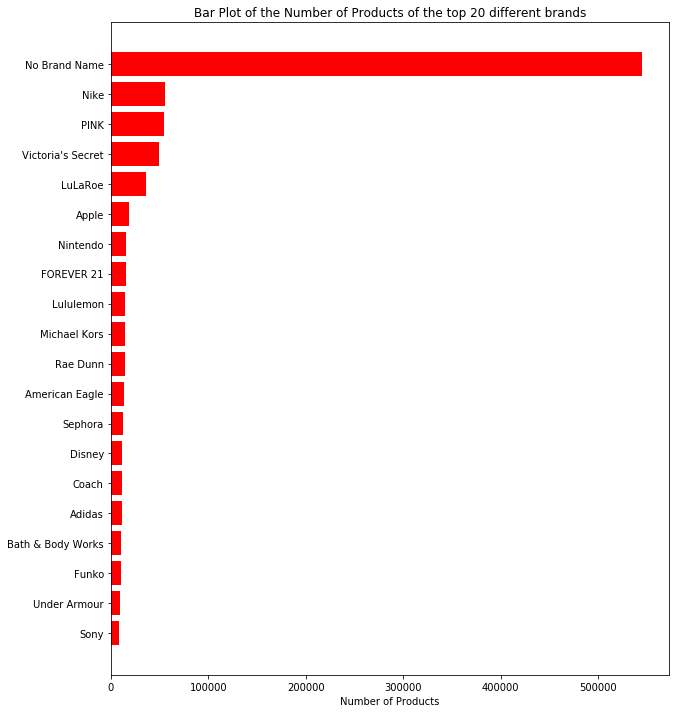

In [69]:
# Plotting the horizontal bar plots with the brand names on the y-axis and number of products on the x-axis
plt.figure(figsize = (10,12))
plt.title("Bar Plot of the Number of Products of the top 20 different brands")
# The array of number of brands as the first argument and the frequency counts as the second argument.
plt.barh(range(len(indices)),mercari_pricedata.brand_name.value_counts()[indices], color = 'r')
# The array of number of brands as the first argument and names of the brands on the y-axis as the second argument to be provided.
plt.yticks(range(len(indices)),[mercari_pricedata.brand_name.value_counts().index[i] for i in indices])
plt.xlabel("Number of Products")

#### CHECKING THE AVERAGE PRICE PER CATEGORY FOR THE TOP 20 CATGEORIES WITH THE AVERAGE PRICE OF THE CATEGORY ALONG THE X-AXIS AND CATGEORIES ALONG THE Y-AXIS

In [71]:
# Getting the top 20 categories with the index as the category name and their average log price
indices = np.argsort(mercari_pricedata['price'].groupby(mercari_pricedata.category_name).agg('mean'))[-20:]

Text(0.5, 0, 'Average Price')

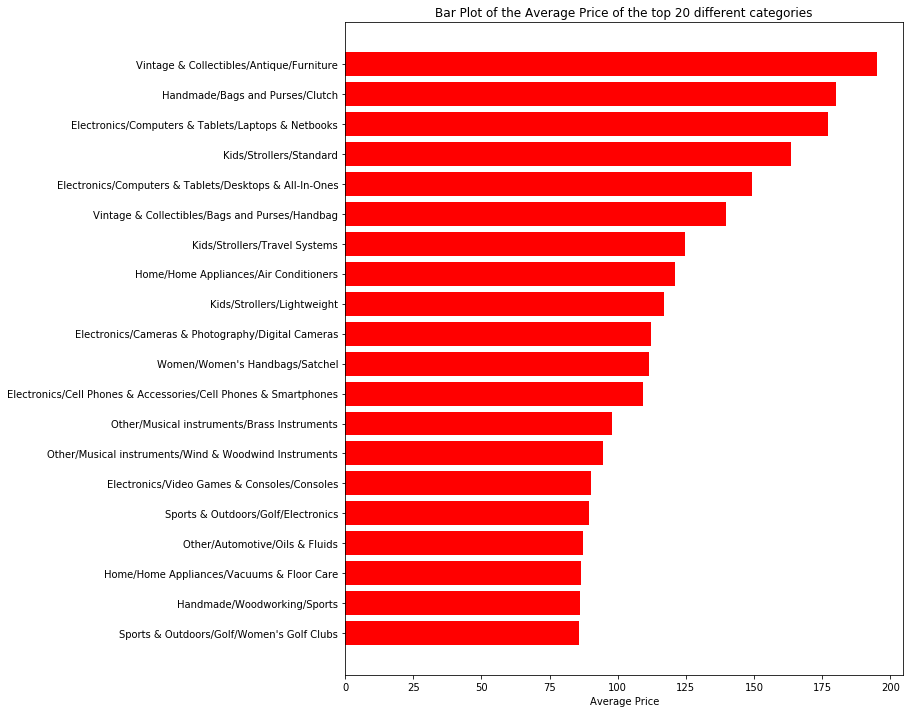

In [74]:
# Plotting the horizontal bar plots with the category names on the y-axis and average log price on the x-axis
plt.figure(figsize = (10,12))
plt.title("Bar Plot of the Average Price of the top 20 different categories")
# The array of number of categories as the first argument and the average price as the second argument.
plt.barh(range(len(indices)),mercari_pricedata['price'].groupby(mercari_pricedata.category_name).agg('mean')[indices], color = 'r')
# The array of number of categories as the first argument and names of the categories on the y-axis as the second argument to be provided as the labels.
plt.yticks(range(len(indices)),[mercari_pricedata['price'].groupby(mercari_pricedata.category_name).agg('mean').index[i] for i in indices])
plt.xlabel('Average Price')

#### CHECKING THE AVERAGE PRICE PER BRAND FOR THE TOP 20 BRANDS WITH THE AVERAGE PRICE ON THE X-AXIS AND THE BRANDS ALONG THE Y-AXIS

In [77]:
# Getting the top 20 brands with the index as the brand name and the average log price as the values
indices = np.argsort(mercari_pricedata['price'].groupby(mercari_pricedata.brand_name).agg('mean'))[-20:]

Text(0.5, 0, 'Average Price')

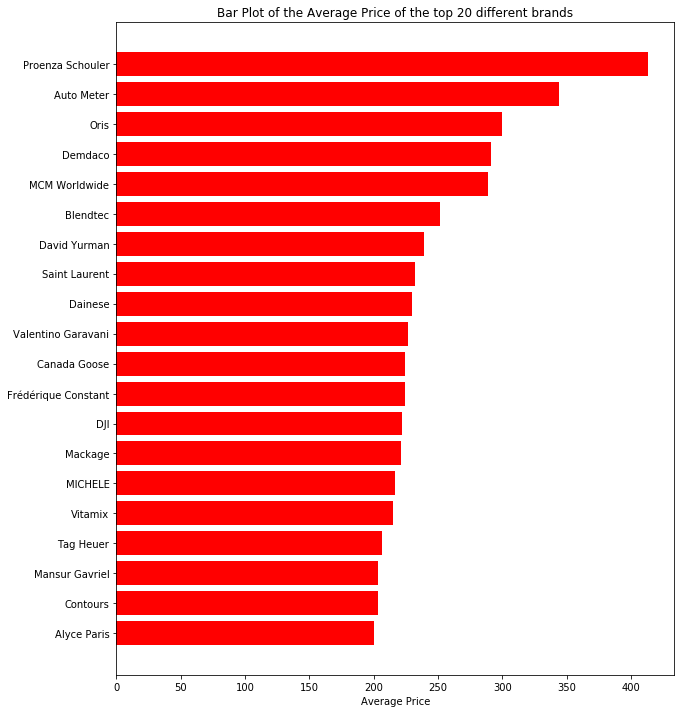

In [78]:
# Plotting the horizontal bar plots with the category names on the y-axis and average log price on the x-axis
plt.figure(figsize = (10,12))
plt.title("Bar Plot of the Average Price of the top 20 different brands")
# The array of number of brands as the first argument and the average log price as the second argument.
plt.barh(range(len(indices)),mercari_pricedata['price'].groupby(mercari_pricedata.brand_name).agg('mean')[indices], color = 'r')
# The array of number of brands as the first argument and names of the categories on the y-axis as the second argument to be provided.
plt.yticks(range(len(indices)),[mercari_pricedata['price'].groupby(mercari_pricedata.brand_name).agg('mean').index[i] for i in indices])
plt.xlabel('Average Price')

#### SEPARATING OUT THE THREE DIFFERENT CATEGORIES FROM THE PRODUCTS

In [79]:
# Defining a function to separate out the three sub categories

def category_split(category):
    '''This function separates out 3 particular sub categories from a category name'''
    
    # Defining a try-except block to check whether the category can be splitted into sub categories or not. The except block
    # catches the exception if there is no '/' in the category name and then returns a list with strings No Label repeated 3
    # times
    try:
        return category.split('/')
    except:
        return ("No Label","No Label","No Label")

In [80]:
'''Separating out 3 different sub categories from the main category column in the data'''

# Reference :- https://www.kaggle.com/maheshdadhich/i-will-sell-everything-for-free-0-55
mercari_pricedata['general_cat'], mercari_pricedata['subcat_1'], mercari_pricedata['subcat_2'] = zip(*mercari_pricedata['category_name'].apply(category_split))


In [81]:
# Checking the first 5 rows of the data

print("The first 5 rows of the data after separating out the 3 sub categories from the category_name column are: ")

mercari_pricedata.head()

The first 5 rows of the data after separating out the 3 sub categories from the category_name column are: 


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand Name,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand Name,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


#### CHECKING THE COUNTS OF THE PRODUCTS BELONGING TO EACH OF THE SUB CATEGORIES WITH THE UNIQUE CATEGORIES ALONG THE X-AXIS AND COUNT OF THE PRODUCTS ALONG THE Y-AXIS

#### CHECKING THE GENERAL_CATEGORY PRODUCTS FOR THEIR COUNTS

In [82]:
'''Getting the number of unique general categories'''

print("The number of unique general categories are {} ".format(mercari_pricedata.general_cat.nunique()))

The number of unique general categories are 11 


Text(0.5, 0, 'Number of Products')

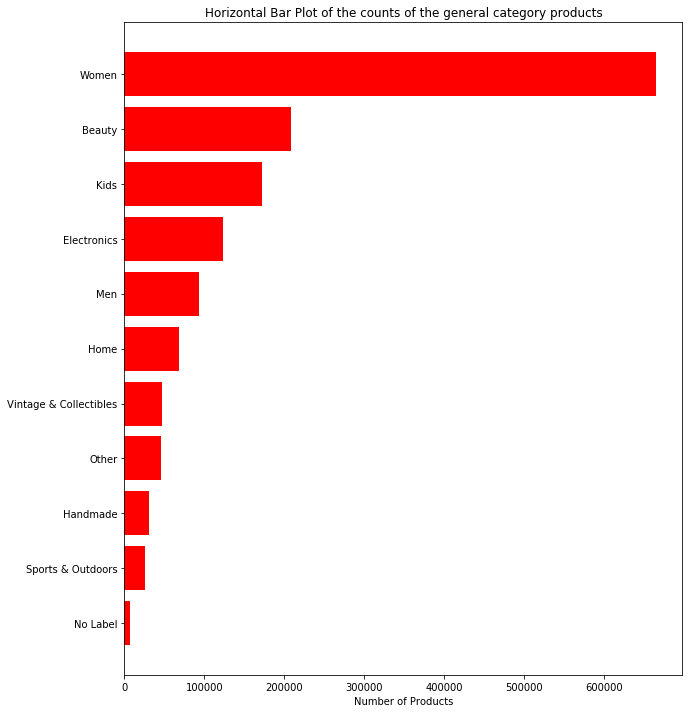

In [83]:
# Getting the series with the counts of the General Category products wherein the index represents the General Category
indices = np.argsort(mercari_pricedata.general_cat.value_counts())[-11:]

# Plotting the horizontal bar plots
plt.figure(figsize = (10,12))
plt.title("Horizontal Bar Plot of the counts of the general category products")
# The array of number of general categories as the first argument and the frequency count as the second argument.
plt.barh(range(len(indices)), mercari_pricedata.general_cat.value_counts()[indices], color = 'r')
# The array of number of categories as the first argument and names of the categories on the y-axis as the second argument to be provided.
plt.yticks(range(len(indices)),[mercari_pricedata.general_cat.value_counts().index[i] for i in indices])
plt.xlabel("Number of Products")

#### CHECKING THE SUB-CATEGORY_1 PRODUCTS FOR THEIR COUNTS

In [84]:
'''Getting the number of unique first sub-category'''

print("The number of unique first sub-category are {} ".format(mercari_pricedata.subcat_1.nunique()))

The number of unique first sub-category are 114 


Text(0.5, 0, 'Number of Products')

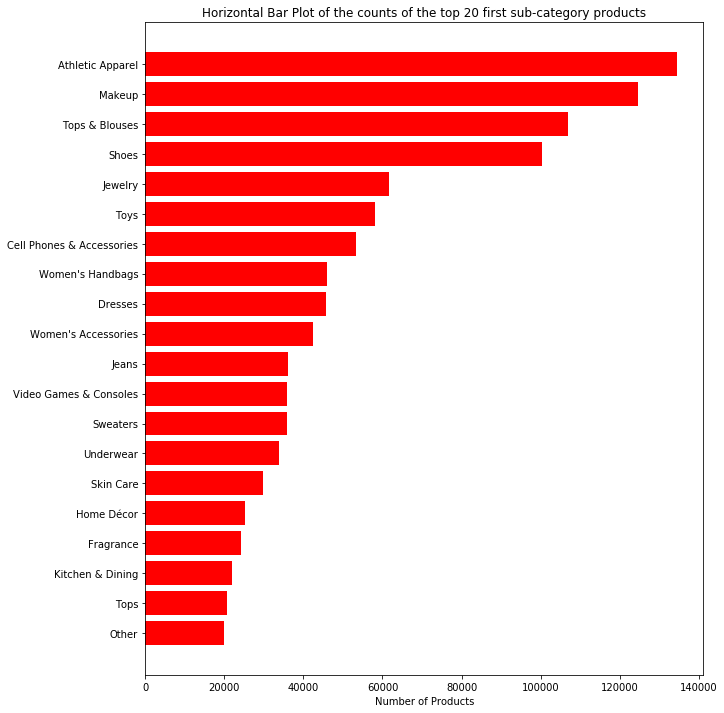

In [85]:
# Getting the series with the counts of the Sub-Category1 products wherein the index represents the General Category
indices = np.argsort(mercari_pricedata.subcat_1.value_counts())[-20:]

# Plotting the horizontal bar plots
plt.figure(figsize = (10,12))
plt.title("Horizontal Bar Plot of the counts of the top 20 first sub-category products")
# The array of number of first sub category as the first argument and the frequency count as the second argument.
plt.barh(range(len(indices)), mercari_pricedata.subcat_1.value_counts()[indices], color = 'r')
# The array of number of first sub category as the first argument and names of the sub category 1 on the y-axis as the second argument to be provided.
plt.yticks(range(len(indices)),[mercari_pricedata.subcat_1.value_counts().index[i] for i in indices])
plt.xlabel("Number of Products")

#### CHECKING THE SUB-CATEGORY_2 PRODUCTS FOR THEIR COUNTS

In [86]:
'''Getting the number of unique second subcategory products'''

print("The number of unique second sub-category are {} ".format(mercari_pricedata.subcat_2.nunique()))

The number of unique second sub-category are 871 


Text(0.5, 0, 'Number of Products')

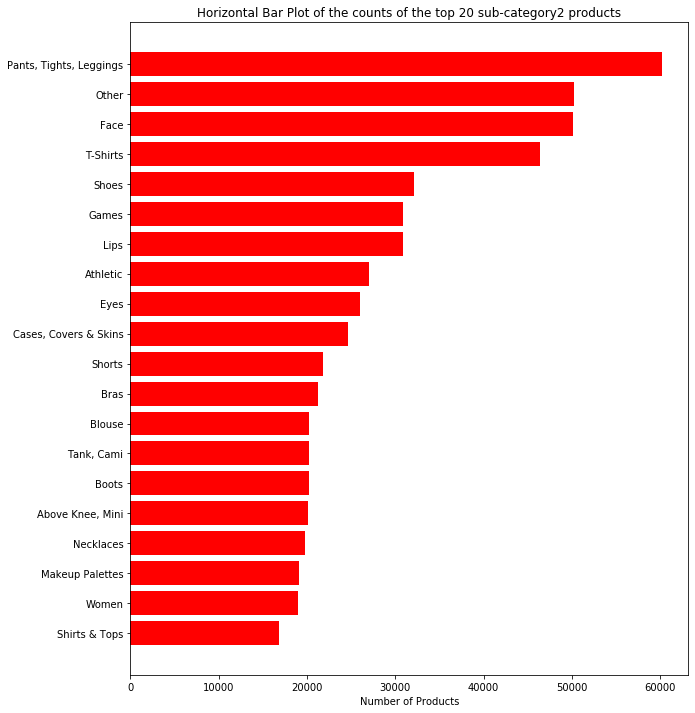

In [87]:
# Getting the series with the counts of the sub-category2 products wherein the index represents the General Category
indices = np.argsort(mercari_pricedata.subcat_2.value_counts())[-20:]

# Plotting the horizontal bar plots
plt.figure(figsize = (10,12))
plt.title("Horizontal Bar Plot of the counts of the top 20 sub-category2 products")
# The array of number of second sub category as the first argument and the frequency count as the second argument.
plt.barh(range(len(indices)), mercari_pricedata.subcat_2.value_counts()[indices], color = 'r')
# The array of number of second sub category as the first argument and names of the sub category 1 on the y-axis as the second argument to be provided.
plt.yticks(range(len(indices)),[mercari_pricedata.subcat_2.value_counts().index[i] for i in indices])
plt.xlabel("Number of Products")

#### CHECKING OUT THE PRICE DISTRIBUTION OF THE GENERAL CATEGORY WITH THE UNIQUE CATEGORIES ALONG THE Y-AXIS ANDTHE LOG_PRICE ALONG THE X-AXIS ON THE FIRST PLOT AND PRICE ON THE X-AXIS ON THE SECOND PLOT

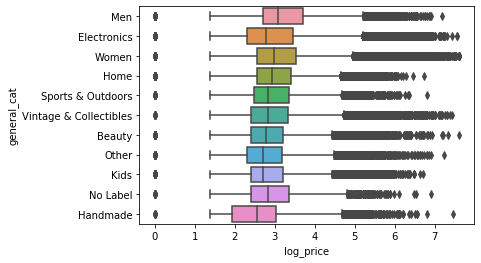

In [88]:
'''Plotting the Box Plots for the Price distribution of the general category'''

sns.boxplot(x = mercari_pricedata.log_price, y = mercari_pricedata.general_cat)

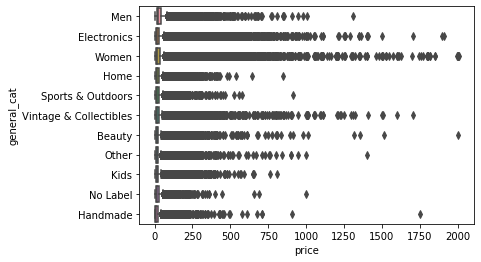

In [89]:
'''Plotting the Box Plots for the Price distribution of the general category'''

sns.boxplot(x = mercari_pricedata.price, y = mercari_pricedata.general_cat)

#### OBSERVATION:-

1) From the first boxplot, we can clearly see that general categories have overlaps in the prices of the products. So, general category on it's own would not be able to predict the prices of the products perfectly. This observation is based on this sample of data which is given. But this sample is big enough for the result to be considered.

2) The second box plot is not so clear as it is plotted with the price.

#### UNIVARIATE ANALYSIS OF EACH OF THE THREE CATEGORY HEADINGS AND THE BRANDS

We would run an <b> anova test </b> to check whether the mean price between each of the levels of the general categories and sub categories along with the brands are different or not. If the mean price of the various category levels of the general categories and sub categories along with the brands are not different, then we can conclude that the prices of each of the brands/categories are not well separated and when each of these is taken into account one at a time, then it cannot determine the price of the product.

#### ONE-WAY ANOVA FOR GENERAL CATEGORY

In [44]:
# Reference :- https://www.pythonfordatascience.org/anova-python/

# Defining the significance level
alpha = 0.05

model = ols('log_price ~ C(general_cat)', data = mercari_pricedata).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(general_cat),31710.838727,10.0,5873.152771,0.0
Residual,800457.289358,1482524.0,NaN,NaN


#### OBSERVATION:-

1) The dependent variable is the log_price whereas the independent variable is general_cat with 11 different levels.

2) The null hypothesis assumes that the means across all the 11 levels of the independent variable are the same whereas the alternative hypothesis assumes that atleast one of the means out of the 11 means is different from the others.

3) The F statistics also clearly shows that the ratio of standardized between sum of squares and within sum of squares is way greater than 1 i.e. we can say that the group means of log price are well separated.

4) The p-value which gives the probability of seeing a F-value as high as this is almost 0% and so we reject our null hypothesis at a significance level of 5%. Hence, we can conclude that atleast one of the 11 mean prices is different from the rest or in other words, atleast one category is well separated from the others in terms of log of price.

#### CONCLUSION:-

At the population level, we can say that the mean log price of atleast one of the general categories of products is different from the means of other general categories. We can see a similar pattern for the category Handmade and Men from the box plot as they have their 1st, 2nd and 3rd quantiles different from others but that doesn't guarantee that the means of all the 11 levels which are the categories are well separated.

#### ONE-WAY ANOVA FOR FIRST SUB-CATEGORY

In [45]:
# Defining the significance level
alpha = 0.05

model = ols('log_price ~ C(subcat_1)', data = mercari_pricedata).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(subcat_1),106907.356974,113.0,1933.777579,0.0
Residual,725260.771112,1482421.0,NaN,NaN


#### OBSERVATION:-

1) The dependent variable is the log_price whereas the independent variable is subcat_1 with 114 different levels.

2) The null hypothesis assumes that the mean log prices across all the 114 levels of the independent variable are the same whereas the alternative hypothesis assumes that atleast one of the means out of the 114 means is different from the others.

3) The F statistics also clearly shows that the ratio of standardized between sum of squares and within sum of squares is way greater than 1 i.e. we can say that the group means of log price are well separated.

4) The p-value which gives the probability of seeing a F-value as high as this is 0% and so we reject our null hypothesis at a significance level of 5%. Hence, we can conclude that atleast one of the 114 mean prices is different from the rest or in other words, atleast one category is well separated from the others in terms of log of price.

#### CONCLUSION:-

At the population level, we can say that the mean log price of atleast one of the sub_category 1 of products is different from the means of other sub category_1.

#### NOTE:- ONE-WAY ANOVA FOR SECOND SUB-CATEGORY AND BRANDS COULD NOT BE PERFORMED AS THE RAM CRASHED AND PC RESTARTED.

### FEATURE-1: ITEM DESCRIPTION LENGTH

In [90]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wazir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
def count_of_words(text):
    '''This function would remove the punctuations, numbers and 
    stopwords from the text and then converting everything to lowercase
    and thereby returning the number of words in the text'''
    try:
        text = text.replace('\\t','') # Removing the tabs
        text = text.replace('\\r','') # Removing the \r
        text = text.replace('\\n','') # Removing the newline character
        text = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+','',text) # Removing the punctuations
        text = re.sub('[0-9]+','',text) # Removing the numbers
        # Capturing the clean text in a string and then returning the length of the list for words greater than length of 3        
        new_text = ' '.join(word for word in text.split() if word.lower() not in nltk.corpus.stopwords.words('english') and len(word)>3)
        # Returning the length of the words in the string new_text
        return len(new_text.split())        
    except:
        return 0

In [93]:
'''Preprocessing the Item_Description column and storing the length in a variable Item_Description_Length'''

# Initializing a new list to store item descriptions
desc_length_ls = []

for item_description in tqdm(mercari_pricedata["item_description"].values):
    desc_length_ls.append(count_of_words(item_description))

mercari_pricedata["item_description_Length"] = desc_length_ls

100%|█████████████████████████████████████████████████████████████████████| 1482535/1482535 [12:49:37<00:00, 32.10it/s]


In [94]:
'''Checking the first five rows of the data'''

print("The first five rows of the data after adding the feature item_description_length are :")

mercari_pricedata.head()

The first five rows of the data after adding the feature item_description_length are :


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_cat,subcat_1,subcat_2,item_description_Length
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,1
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,14
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse,10
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand Name,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents,14
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand Name,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces,3


#### SAVING THE DATA WITH ITEM DESCRIPTION LENGTH

In [95]:
# Creating the folder mercari_data_item_desc_length
if not os.path.isdir("mercari_data_item_desc_length"):
    os.mkdir('mercari_data_item_desc_length')

# Saving the data with the Item_description_length
mercari_pricedata.to_csv("mercari_data_item_desc_length/mercari_data_itemdesc_len.csv", index= None)

In [45]:
# Loading back the data with the item_description_Length
mercari_pricedata = pd.read_csv("mercari_data_item_desc_length/mercari_data_itemdesc_len.csv")

#### CHECKING THE ASSOCIATION OF LENGTH OF THE ITEM_DESC WITH THE PRICE AND THE LOG_PRICE WITH A SCATTER PLOT

Text(0.5, 1.0, 'Scatter Plot between Item Description and the Log Price of the products')

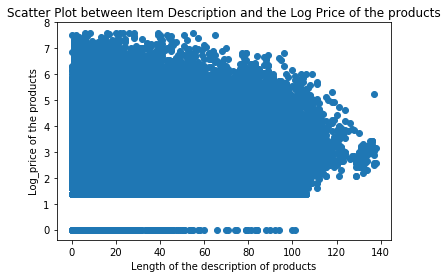

In [96]:
'''Plotting a scatter plot between item_description_length and log_price''' 

plt.scatter(mercari_pricedata['item_description_Length'],mercari_pricedata['log_price'])
plt.xlabel("Length of the description of products")
plt.ylabel("Log_price of the products")
plt.title("Scatter Plot between Item Description and the Log Price of the products")

Text(0.5, 1.0, 'Scatter Plot between Item Description and the Price of the products')

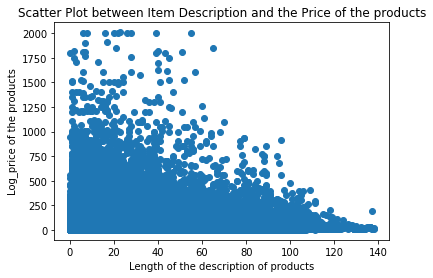

In [97]:
'''Plotting a scatter plot between item_description_length and price''' 

plt.scatter(mercari_pricedata['item_description_Length'],mercari_pricedata['price'])
plt.xlabel("Length of the description of products")
plt.ylabel("Log_price of the products")
plt.title("Scatter Plot between Item Description and the Price of the products")

#### OBSERVATION:-

1) The first scatter plot shows that with the increase in description length, the log price decreases but the association is very weak as we can see that for any one description length, the products are low in price as well as they are highly priced. So, we would also plot the average log price for the description lengths.

2) The second scatter plot shows that the price decreases with the description length of the products.

#### CONCLUSION:-

It seems from the plot that reading of a lengthy description downgrades the product wrt it's price. People might not be interested in reading a big description without any numbers or any special offers highlighted in bold.

Text(0.5, 1.0, 'Line Plot between Item Description and the Average Log Price of the products')

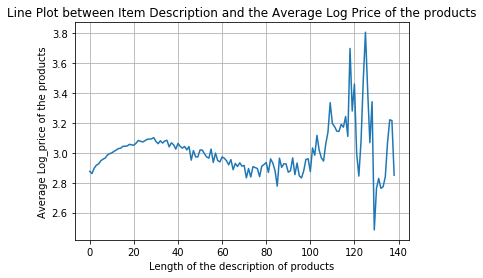

In [98]:
'''Plotting the description length against the average log price'''

average_log_price = mercari_pricedata.groupby('item_description_Length')['log_price'].agg("mean").reset_index()

plt.plot(average_log_price.item_description_Length, average_log_price.log_price)
plt.xlabel("Length of the description of products")
plt.ylabel("Average Log_price of the products")
plt.grid()
plt.title("Line Plot between Item Description and the Average Log Price of the products")

Text(0.5, 1.0, 'Line Plot between Item Description and the Average Price of the products')

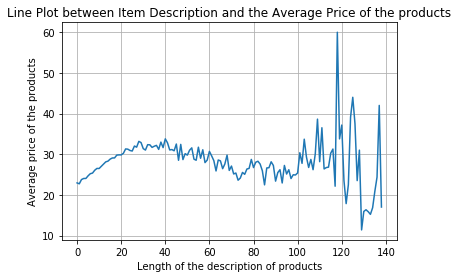

In [100]:
'''Plotting the description length against the average price'''

average_price = mercari_pricedata.groupby('item_description_Length')['price'].agg("mean").reset_index()

plt.plot(average_price.item_description_Length, average_price.price)
plt.xlabel("Length of the description of products")
plt.ylabel("Average price of the products")
plt.grid()
plt.title("Line Plot between Item Description and the Average Price of the products")

#### OBSERVATION:-

1) The above line plots shows the variation in the average log price and price with the Item Description Length. We see that with the increase in the length of the cleaned item description, the average log price increases initially and then it decreases and eventually increases in the end with very lengthy item descriptions. With very lengthy item descriptions, the variation in the average log price increases a lot as can be seen on the extreme right hand side of the plot.

2) The average price for the length of the item description also shows a similar behaviour.

### DATA PREPROCESSING:-

The Preprocessing part of this data would involve mainly the cleaning of the <b> item description </b> given. The item description would be tokenized into words of length less than 3 after removing the punctuations and stop words and then a feature of the length of the description would be created. Also, the word cloud for the Item Description would be visualized for the top categories

### TEXT PREPROCESSING - ITEM DESCRIPTION

We tokenize the Item description by tokenizing the text into sentences and then tokenizing the sentences into words. After that we filter out those words which are not stop words and are of legth greater than 3.

#### PRE-PROCESSING:REMOVAL OF PUNCTUATIONS, NUMBERS AND STOPWORDS

In [101]:
# Defining the function decontracted

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [109]:
# Reference :- https://medium.com/analytics-vidhya/mercari-price-suggestion-challenge-a-machine-learning-regression-case-study-9d776d5293a0

def preprocess(text_array):
    # Initializing an empty list named preprocessed_total_train
    preprocessed_total_train = []

    for sentence in tqdm(text_array):
        sentence = str(sentence)
        sent = decontracted(sentence)
        sent = sent.replace('\\r',' ')
        sent = sent.replace('\\t',' ')
        sent = sent.replace('\\"',' ')
        sent = sent.replace('\\n',' ')
        sent = re.sub('[0-9]+',' ',sent)
        sent = re.sub('[^A-Za-z]+',' ',sent)
        sent = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+',' ',sent) # Removing the punctuations
        sent = ' '.join(e for e in sent.split() if e.lower() not in nltk.corpus.stopwords.words('english') and len(e)>=3)
        preprocessed_total_train.append(sent.lower().strip())
    return preprocessed_total_train
        
#preprocessed_total_train[10000]   

#### PREPROCESSING THE ITEM DESCRIPTION

In [110]:
# Preprocessing the item description for the first 500000 products

final_preprocessed_train = preprocess(mercari_pricedata['item_description'][0:500000].values)

100%|████████████████████████████████████████████████████████████████████████| 500000/500000 [3:41:38<00:00, 37.60it/s]


In [111]:
# Converting the list to a dataframe
first_fivelakhs_products_df = pd.DataFrame(final_preprocessed_train, columns = ["Preprocessed_Item_desc"])

if not os.path.isdir("Preprocessed_Item_Desc"):
    os.mkdir("Preprocessed_Item_Desc")

# Saving the dataframe of the first five lakh products to the disk
first_fivelakhs_products_df.to_csv("Preprocessed_Item_Desc/preprocessed_item_desc.csv", index = None)

In [112]:
# Appending the second chunk of data of 500000 product's item description

final_preprocessed_train.extend(preprocess(mercari_pricedata['item_description'][500000:1000000].values))

100%|████████████████████████████████████████████████████████████████████████| 500000/500000 [2:48:54<00:00, 49.33it/s]


In [113]:
# Converting the list to a dataframe
tenlakhs_products_df = pd.DataFrame(final_preprocessed_train, columns = ["Preprocessed_Item_desc"])

# Saving the dataframe of the 100000 products to the disk
tenlakhs_products_df.to_csv("Preprocessed_Item_Desc/preprocessed_item_desc.csv", index = None)

In [114]:
# Appending the third and final chunk of data of 500000 product's item description

final_preprocessed_train.extend(preprocess(mercari_pricedata['item_description'][1000000:1482535].values))

100%|████████████████████████████████████████████████████████████████████████| 482535/482535 [4:12:48<00:00, 31.81it/s]


In [115]:
# Converting the list to a dataframe
total_preprocessed_item_desc_df = pd.DataFrame(final_preprocessed_train, columns = ["Preprocessed_Item_desc"])

total_preprocessed_item_desc_df.to_csv("Preprocessed_Item_Desc/preprocessed_item_desc.csv", index = None)

In [116]:
# Adding a column of preprocessed_item_description

mercari_pricedata['preprocessed_item_desc'] = final_preprocessed_train

In [118]:
# Saving the data 

# Creating the directory mercari_pricedata_tokens
if not os.path.isdir("Preprocessed_Item_Desc"):
    os.mkdir("Preprocessed_Item_Desc")

mercari_pricedata.to_csv("Preprocessed_Item_Desc/mercari_pricedata_preprocessed_itemdesc.csv", index=None)

In [2]:
# Loading back the data

mercari_pricedata = pd.read_csv("Preprocessed_Item_Desc/mercari_pricedata_preprocessed_itemdesc.csv")

#### VISUALIZING THE WORD CLOUDS FOR THE TOP 4 GENERAL CATEGORIES WHICH OCCUR MOST FREQUENTLY AFTER CONCATENATING THE CATEGORY NAME AND THE ITEM DESCRIPTION

In [3]:
# Reference - https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling

# Initializing a dictionary to store the categories and the tokens
cat_desc = dict()
cat_list = ['Women','Beauty','Kids','Electronics']

# For the above four categories, we join the category and the preprocessed item description and store them as a list in a dictionary with the key as the category name
for cat in cat_list:
    text_ls = mercari_pricedata[mercari_pricedata['general_cat'] == cat][['general_cat','preprocessed_item_desc']].values.tolist()
    for text in text_ls:
        if cat in cat_desc.keys():
            cat_desc[cat].extend(' '.join(list(map(str, text))).split())
        else:
            cat_desc[cat] = ' '.join(list(map(str, text))).split()
             
print("The number of keys of the dictionary cat_desc are : {}".format(len(cat_desc.keys())))

The number of keys of the dictionary cat_desc are : 4


In [4]:
# Reference - https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling


# find the most common words for the top 4 categories
women100 = Counter(cat_desc['Women']).most_common(100)
beauty100 = Counter(cat_desc['Beauty']).most_common(100)
kids100 = Counter(cat_desc['Kids']).most_common(100)
electronics100 = Counter(cat_desc['Electronics']).most_common(100)

In [120]:
# Installing using pip3
!pip3 install wordcloud

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\Wazir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [127]:
!pip install wordcloud

In [5]:
#Including the wordcloud to the path
os.environ["PATH"] += os.pathsep + 'C:/Users/Wazir/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0/LocalCache/local-packages/Python37/Scripts/wordcloud'

In [6]:
# Reference - https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling
# Defining the function wordcloud
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

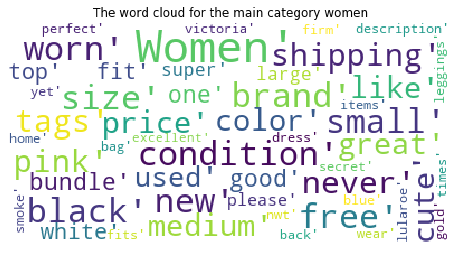

In [7]:
# Generating the word cloud for the category women and plotting the same

# Reference:- https://www.geeksforgeeks.org/generating-word-cloud-python/
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(generate_wordcloud(women100))
plt.axis("off")
plt.title("The word cloud for the main category women")
plt.show()

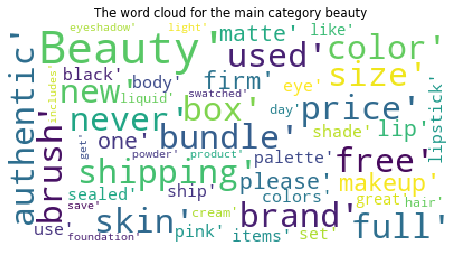

In [8]:
# Generating the word cloud for the category beauty

# Reference:- https://www.geeksforgeeks.org/generating-word-cloud-python/
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(generate_wordcloud(beauty100))
plt.axis("off")
plt.title("The word cloud for the main category beauty")
plt.show()


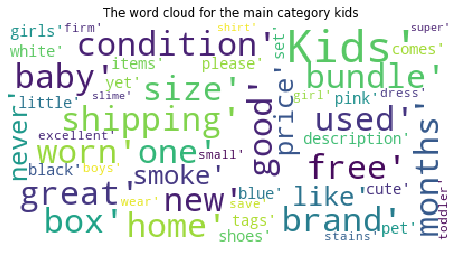

In [9]:
# Generating the word cloud for the category kids

# Reference:- https://www.geeksforgeeks.org/generating-word-cloud-python/
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(generate_wordcloud(kids100))
plt.axis("off")
plt.title("The word cloud for the main category kids")
plt.show()


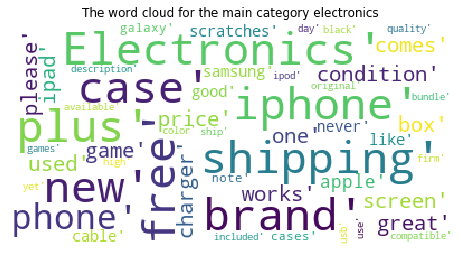

In [10]:
# Generating the word cloud for the category electronics

# Reference:- https://www.geeksforgeeks.org/generating-word-cloud-python/
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(generate_wordcloud(electronics100))
plt.axis("off")
plt.title("The word cloud for the main category electronics")
plt.show()

### FEATURE-2 : SENTIMENT SCORE OF THE ITEM DESCRIPTION

In [11]:
# Downloading the vader_lexicon package
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

train_sentiment = []

for sentence in tqdm(mercari_pricedata.preprocessed_item_desc.values):
    ss = sid.polarity_scores(str(sentence))
    train_sentiment.append(ss)
    
# Checking the top 2 elements of train_sentiment
train_sentiment[0:2]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Wazir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████| 1482535/1482535 [12:26<00:00, 1985.34it/s]


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.8957}]

In [12]:
# Converting the list of dictionaries into a dataframe

sentiment_score_df = pd.DataFrame(train_sentiment)

# Checking the first five rows of the dataframe

sentiment_score_df.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,0.565,0.435,0.8957
2,0.0,0.667,0.333,0.6124
3,0.0,0.728,0.272,0.6808
4,0.0,1.000,0.000,0.0000


In [13]:
# Adding the sentiment score to the total data

mercari_pricedata['neg'] = sentiment_score_df['neg']
mercari_pricedata['neu'] = sentiment_score_df['neu']
mercari_pricedata['pos'] = sentiment_score_df['pos']
mercari_pricedata['compound'] = sentiment_score_df['compound']

In [14]:
# Checking the first five rows of the data
mercari_pricedata.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_cat,subcat_1,subcat_2,item_description_Length,preprocessed_item_desc,neg,neu,pos,compound
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,1,description yet,0.0,1.000,0.000,0.0000
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,14,keyboard great condition works like came box p...,0.0,0.565,0.435,0.8957
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse,10,adorable top hint lace key hole back pale pink...,0.0,0.667,0.333,0.6124
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand Name,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents,14,new tags leather horses retail stand foot high...,0.0,0.728,0.272,0.6808
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand Name,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces,3,complete certificate authenticity,0.0,1.000,0.000,0.0000


In [15]:
# Saving the file to disk

if not os.path.isdir("data_after_sentiment_score"):
    os.mkdir("data_after_sentiment_score")
    
mercari_pricedata.to_csv("data_after_sentiment_score/mercari_data_with_sentiment_score.csv", index=None)

In [2]:
# Loading the data back

mercari_pricedata = pd.read_csv("data_after_sentiment_score/mercari_data_with_sentiment_score.csv")

In [16]:
# Checking the first five rows

mercari_pricedata.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_cat,subcat_1,subcat_2,item_description_Length,preprocessed_item_desc,neg,neu,pos,compound
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,1,description yet,0.0,1.000,0.000,0.0000
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,14,keyboard great condition works like came box p...,0.0,0.565,0.435,0.8957
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse,10,adorable top hint lace key hole back pale pink...,0.0,0.667,0.333,0.6124
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand Name,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents,14,new tags leather horses retail stand foot high...,0.0,0.728,0.272,0.6808
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand Name,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces,3,complete certificate authenticity,0.0,1.000,0.000,0.0000


#### FEATURE-3 : CATEGORY OF PRODUCTS AS CHEAP, AFFORDABLE AND EXPENSIVE

The products would be cetagorized into three categories namely:-

1) Cheap - Products having a price in the top 25 percentile of the price variable.

2) Affordable - Products having a price in between 25 - 50 percentile of the price variable.

3) Expensive - Products having a price greater than 75th percentile of the price variable.

In [19]:
first_quantile_price = np.percentile(mercari_pricedata['price'].values, 25)
third_quantile_price = np.percentile(mercari_pricedata['price'].values, 75)

In [21]:
mercari_pricedata["product_category"] = ["cheap" if price <= first_quantile_price else("affordable" if (price > first_quantile_price and price <= third_quantile_price) else "expensive") for price in mercari_pricedata["price"].values]

In [22]:
# Checking the first five rows of the data

mercari_pricedata.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_cat,subcat_1,subcat_2,item_description_Length,preprocessed_item_desc,neg,neu,pos,compound,product_category
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,1,description yet,0.0,1.000,0.000,0.0000,cheap
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,14,keyboard great condition works like came box p...,0.0,0.565,0.435,0.8957,expensive
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse,10,adorable top hint lace key hole back pale pink...,0.0,0.667,0.333,0.6124,cheap
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No Brand Name,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents,14,new tags leather horses retail stand foot high...,0.0,0.728,0.272,0.6808,expensive
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No Brand Name,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces,3,complete certificate authenticity,0.0,1.000,0.000,0.0000,expensive


#### SAVING THE DATA WITH THE FEATURE_3

In [23]:
if not os.path.isdir("mercari_data_product_category"):
    os.mkdir("mercari_pricedata_product_category")
    
mercari_pricedata.to_csv("mercari_pricedata_product_category/mercari_pricedata_product_category.csv")

#### LOADING BACK THE DATA

In [2]:
mercari_pricedata = pd.read_csv("mercari_pricedata_product_category/mercari_pricedata_product_category.csv")

#### THE TOP 10 BRANDS IN THE CHEAP CATEGORY

In [5]:
# Subsetting the data with only the cheap products

cheap_products_df = mercari_pricedata[mercari_pricedata["product_category"] == "cheap"]

# Getting the information at the brand level by the sum of prices of products

top_brands_cheap = cheap_products_df.groupby("brand_name").agg({"price":"sum"}).reset_index().sort_values(by = ["price"], ascending = False)

print("The top 10 brands in the cheap category are: ")
top_brands_cheap[0:10]

The top 10 brands in the cheap category are: 


,brand_name,price
2091,No Brand Name,1443763.0
3065,Victoria's Secret,68361.0
2194,PINK,59526.0
1053,FOREVER 21,52484.0
2078,Nike,52069.0
886,Disney,35105.0
186,Apple,34652.0
2142,Old Navy,29476.0
147,American Eagle,27814.5
335,Bath & Body Works,27436.0


In [6]:
# Considering the unique set of top 10 brands in the cheap category

top_cheap_brands = set(top_brands_cheap.brand_name[0:10].values)

print("The set of cheap brands are as follows:")
top_cheap_brands

The set of cheap brands are as follows:


{'American Eagle',
 'Apple',
 'Bath & Body Works',
 'Disney',
 'FOREVER 21',
 'Nike',
 'No Brand Name',
 'Old Navy',
 'PINK',
 "Victoria's Secret"}

#### THE TOP 10 BRANDS IN THE AFFORDABLE CATEGORY

In [7]:
# Subsetting the data with only the affordable products

affordable_products_df = mercari_pricedata[mercari_pricedata["product_category"] == "affordable"]

# Getting the information at the brand level by the sum of prices of products

top_brands_affordable = affordable_products_df.groupby("brand_name").agg({"price":"sum"}).reset_index().sort_values(by = ["price"], ascending = False)

print("The top 10 brands in the affordable category are: ")
top_brands_affordable[0:10]

The top 10 brands in the affordable category are: 


,brand_name,price
2669,No Brand Name,4565486.0
2802,PINK,627603.0
3915,Victoria's Secret,566839.0
2655,Nike,555989.0
2269,LuLaRoe,363763.5
183,American Eagle,159771.0
3073,Rae Dunn,138915.0
1308,FOREVER 21,130156.0
2665,Nintendo,130029.5
3350,Sephora,125552.5


In [8]:
# Considering the unique set of top 10 brands in the affordable category

top_affordable_brands = set(top_brands_affordable.brand_name[0:10].values)

print("The set of affordable brands are as follows:")
top_affordable_brands

The set of affordable brands are as follows:


{'American Eagle',
 'FOREVER 21',
 'LuLaRoe',
 'Nike',
 'Nintendo',
 'No Brand Name',
 'PINK',
 'Rae Dunn',
 'Sephora',
 "Victoria's Secret"}

#### THE TOP 10 BRANDS IN THE EXPENSIVE CATEGORY

In [9]:
# Subsetting the data with only the affordable products

expensive_products_df = mercari_pricedata[mercari_pricedata["product_category"] == "expensive"]

# Getting the information at the brand level by the sum of prices of products

top_brands_expensive = expensive_products_df.groupby("brand_name").agg({"price":"sum"}).reset_index().sort_values(by = ["price"], ascending = False)

print("The top 10 brands in the affordable category are: ")
top_brands_expensive[0:10]

The top 10 brands in the affordable category are: 


,brand_name,price
1873,No Brand Name,5109833.0
157,Apple,1177970.5
1861,Nike,1093522.0
1570,LuLaRoe,878086.5
1724,Michael Kors,819372.5
1954,PINK,751942.0
1561,Louis Vuitton,651044.0
1584,Lululemon,600075.0
2724,Victoria's Secret,505335.5
2131,Rae Dunn,381642.0


In [10]:
# Considering the unique set of top 10 brands in the affordable category

top_expensive_brands = set(top_brands_expensive.brand_name[0:10].values)

print("The set of affordable brands are as follows:")
top_expensive_brands

The set of affordable brands are as follows:


{'Apple',
 'Louis Vuitton',
 'LuLaRoe',
 'Lululemon',
 'Michael Kors',
 'Nike',
 'No Brand Name',
 'PINK',
 'Rae Dunn',
 "Victoria's Secret"}

#### CHOOSING THE FINAL BRANDS FOR ANALYSIS PRESENT IN EACH OF THE THREE CATEGORIES

In [11]:
# Getting the set of brands which are common in the top 10 brands of cheap and affordable categories

cheap_affordable = top_cheap_brands.intersection(top_affordable_brands)

print("The brands which are common to both the cheap and affordable categories are :")
cheap_affordable

The brands which are common to both the cheap and affordable categories are :


{'American Eagle',
 'FOREVER 21',
 'Nike',
 'No Brand Name',
 'PINK',
 "Victoria's Secret"}

In [12]:
# Getting the set of brands which are common to all the 3 categories of products

cheap_affordable_expensive = cheap_affordable.intersection(top_expensive_brands)

print("The brands which are common to all the three categories of products are :")
cheap_affordable_expensive

The brands which are common to all the three categories of products are :


{'Nike', 'No Brand Name', 'PINK', "Victoria's Secret"}

#### CONCLUSION:-

We got three brands which are common to all the 3 categories of products and are on the higher end in terms of sales in these 3 categories. They are:-

1) Nike

2) PINK

3) Victoria's Secret

#### CONVERTING THE ITEM DESCRIPTION FOR EACH OF THE PRODUCTS OF THE BRANDS INTO A VECTOR FOR EACH OF THE CATEGORIES AND GETTING THE AVERAGE DISTANCE OF A PRODUCT'S DESCRIPTION FROM OTHER PRODUCTS IN EACH OF THE CATEGORIES

#### NIKE CHEAP CATEGORY ANALYSIS

In [3]:
# Vectorizing Tfidf for the cheap category products of Nike, just considering unigrams

tfidf_vect = TfidfVectorizer(min_df = 10, 
                     max_features = 180000,
                     ngram_range = (1,1))

In [13]:
# Filling out nan values in the preprocessed_item_desc for cheap products

cheap_products_df["preprocessed_item_desc"] = cheap_products_df[["preprocessed_item_desc"]].fillna("No Description")

C:\Users\Wazir\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Doing this on the whole data of products of Nike would take pretty long. So, we would perform the operation on 20% of the products

n_sample = 0.2*cheap_products_df[cheap_products_df["brand_name"] == "Nike"].shape[0]

In [14]:
n_sample = int(n_sample)

print("The number of products of Nike for the cheap category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Nike for the cheap category products on which distance calculation is to be calculated are 1215


In [15]:
# Getting the sample of nike cheap products
nike_sample_cheap = cheap_products_df[cheap_products_df["brand_name"] == "Nike"].sample(n = n_sample, random_state=42)

In [16]:
# Fitting and transforming the products of cheap categories of Nike Brand

nike_cheap_tfidf = tfidf_vect.fit_transform(list(nike_sample_cheap["preprocessed_item_desc"].values))

type(nike_cheap_tfidf)

scipy.sparse.csr.csr_matrix

In [17]:
# Checking the shape of the sparse matrix
nike_cheap_tfidf.toarray().shape

(1215, 202)

In [22]:
# Measuring the average euclidean distance for each product to other products in the cheap category by a function

def euclidean_distance(vec1,vec2):
    temp = vec1 - vec2
    euc_dist = np.sqrt(np.dot(temp.T,temp))
    return euc_dist


In [19]:
# Calling the function euclidean_distance for the first two vectors of the tfidf vectors
import time

start = time.time()
dist = euclidean_distance(nike_cheap_tfidf.toarray()[0], nike_cheap_tfidf.toarray()[1])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors in 0.1296532154083252 seconds, the distance is 1.4142135623730951


In [20]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(nike_cheap_tfidf.toarray().shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(nike_cheap_tfidf.toarray().shape[0]):
        if i == j:
            continue
        else:
            dist = euclidean_distance(nike_cheap_tfidf.toarray()[i], nike_cheap_tfidf.toarray()[j])
            sum+= dist
    list_average_euc_dist.append(sum/nike_cheap_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Nike from the rest of the products in cheap category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Nike from the rest of the products in cheap category is : 1.338641453825576 


In [21]:
# Storing the average euclidean distance for nike cheap categories in a different list

nike_cheap_avg_dist = list_average_euc_dist

In [22]:
# Storing the list as a dataframe with the index as the product list

nike_cheap_products_avgdist = pd.DataFrame(nike_cheap_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(nike_cheap_avg_dist))])

In [23]:
# Checking the first five rows of the dataframe

nike_cheap_products_avgdist.head()

,Avg_Distance
Product_0,1.338641
Product_1,1.391070
Product_2,1.299859
Product_3,1.366000
Product_4,1.361447


In [24]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Nike"):
    os.mkdir("Average Product Distances/Nike")

# Storing the dataframe in the disk
nike_cheap_products_avgdist.to_csv("Average Product Distances/Nike/Cheap_Product_Distances.csv")

#### NIKE AFFORDABLE CATEGORY ANALYSIS

In [14]:
# Filling out nan values in the preprocessed_item_desc for cheap products

affordable_products_df["preprocessed_item_desc"] = affordable_products_df[["preprocessed_item_desc"]].fillna("No Description")

C:\Users\Wazir\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Doing this on the whole data of products of Nike would take pretty long. So, we would perform the operation on 20% of the affordable products of Nike

n_sample = 0.05*affordable_products_df[affordable_products_df["brand_name"] == "Nike"].shape[0]

In [27]:
n_sample = int(n_sample)

print("The number of products of Nike for the affordable category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Nike for the affordable category products on which distance calculation is to be calculated are 1496


In [28]:
# Getting the sample of nike affordable products
nike_sample_affordable = affordable_products_df[affordable_products_df["brand_name"] == "Nike"].sample(n = n_sample, random_state=42)

In [29]:
# Fitting and transforming the products of affordable categories of Nike Brand

nike_affordable_tfidf = tfidf_vect.fit_transform(list(nike_sample_affordable["preprocessed_item_desc"].values))

type(nike_affordable_tfidf)

scipy.sparse.csr.csr_matrix

In [30]:
# Checking the shape of the sparse matrix
nike_affordable_tfidf.toarray().shape

(1496, 325)

#### OBSERVATION:-

1) The dimensions of the transformed matrix of nike cheap products and that of nike affordable products doesn't match. 

2) In order to find the distance between the produtcs of the cheap products of Nike and affordable products of Nike, we need to have same number of dimensions.

3) So, we would pad the remaining dimensions of the transformed matrix of nike cheap products with zeros to match up the dimensions with the transformed matrix of nike affordable products.

In [31]:
# Checking the first five rows of the transformed matrix of the cheap nike products

nike_cheap_tfidf.toarray()[0:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.71227222, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.2356563 , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
# Checking the first row of the transformed matrix of the cheap products of nike

nike_cheap_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.60339279, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.79744413, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
# Changing the dimensions of the transformed matrix of cheap products of Nike to match up with the transformed matrix of affordable products of Nike

# Initializing a matrix with zeros with the number of rows of transformed matrix of nike cheap products and 
# with the number of columns of transformed matrix of nike affordable products
 
nike_cheap_tfidf_modified = np.zeros((nike_cheap_tfidf.toarray().shape[0], nike_affordable_tfidf.toarray().shape[1]))

# Putting the values of the transformed matrix of cheap nike products into this new matrix
nike_cheap_tfidf_modified[:nike_cheap_tfidf.toarray().shape[0],:nike_cheap_tfidf.toarray().shape[1]] = nike_cheap_tfidf.toarray()

# Checking the first five rows of this new matrix
nike_cheap_tfidf_modified[0:5]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.2356563, ..., 0.       , 0.       ,
        0.       ]])

In [34]:
# Checking the shape of the matrix nike_cheap_tfidf_modified

nike_cheap_tfidf_modified.shape

(1215, 325)

In [35]:
import time

start = time.time()
dist = euclidean_distance(nike_cheap_tfidf_modified[0], nike_affordable_tfidf.toarray()[0])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors of nike cheap and affordable products in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors of nike cheap and affordable products in 0.008270502090454102 seconds, the distance is 1.4142135623730951


In [38]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(nike_cheap_tfidf_modified.shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(nike_affordable_tfidf.toarray().shape[0]):
        dist = euclidean_distance(nike_cheap_tfidf_modified[i], nike_affordable_tfidf.toarray()[j])
        sum+= dist
    list_average_euc_dist.append(sum/nike_affordable_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Nike from the rest of the products in affordable category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Nike from the rest of the products in affordable category is : 1.3821884466515428 


In [39]:
# Storing the average euclidean distance for nike affordable categories in a different list

nike_affordable_avg_dist = list_average_euc_dist

In [40]:
# Storing the list as a dataframe with the index as the product list

nike_affordable_products_avgdist = pd.DataFrame(nike_affordable_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(nike_affordable_avg_dist))])

In [41]:
# Checking the first five rows of the dataframe

nike_affordable_products_avgdist.head()

,Avg_Distance
Product_0,1.382188
Product_1,1.397550
Product_2,1.402123
Product_3,1.403620
Product_4,1.363644


In [42]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Nike"):
    os.mkdir("Average Product Distances/Nike")

# Storing the dataframe in the disk
nike_affordable_products_avgdist.to_csv("Average Product Distances/Nike/Affordable_Product_Distances.csv")

#### NIKE EXPENSIVE CATEGORY ANALYSIS

In [15]:
# Filling out nan values in the preprocessed_item_desc for cheap products

expensive_products_df["preprocessed_item_desc"] = expensive_products_df[["preprocessed_item_desc"]].fillna("No Description")

C:\Users\Wazir\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# Doing this on the whole data of products of Nike would take pretty long. So, we would perform the operation on 20% of the affordable products of Nike

n_sample = 0.08*expensive_products_df[expensive_products_df["brand_name"] == "Nike"].shape[0]

In [45]:
n_sample = int(n_sample)

print("The number of products of Nike for the expensive category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Nike for the expensive category products on which distance calculation is to be calculated are 1580


In [46]:
# Getting the sample of nike expensive products
nike_sample_expensive = expensive_products_df[expensive_products_df["brand_name"] == "Nike"].sample(n = n_sample, random_state=42)

In [47]:
# Fitting and transforming the products of expensive categories of Nike Brand

nike_expensive_tfidf = tfidf_vect.fit_transform(list(nike_sample_expensive["preprocessed_item_desc"].values))

type(nike_expensive_tfidf)

scipy.sparse.csr.csr_matrix

In [48]:
# Checking the shape of the sparse matrix
nike_expensive_tfidf.toarray().shape

(1580, 324)

#### OBSERVATION:-

1) The dimensions of the transformed matrix of nike cheap products and that of nike expensive products doesn't match. 

2) In order to find the distance between the produtcs of the cheap products of Nike and expensive products of Nike, we need to have same number of dimensions.

3) So, we would pad the remaining dimensions of the transformed matrix of nike cheap products with zeros to match up the dimensions with the transformed matrix of nike expensive products.

In [49]:
# Checking the first five rows of the transformed matrix of the cheap nike products

nike_cheap_tfidf.toarray()[0:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.71227222, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.2356563 , ..., 0.        , 0.        ,
        0.        ]])

In [50]:
# Checking the first row of the transformed matrix of the cheap products of nike

nike_cheap_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.60339279, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.79744413, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
# Changing the dimensions of the transformed matrix of cheap products of Nike to match up with the transformed matrix of affordable products of Nike

# Initializing a matrix with zeros with the number of rows of transformed matrix of nike cheap products and 
# with the number of columns of transformed matrix of nike affordable products
 
nike_cheap_tfidf_modified_2 = np.zeros((nike_cheap_tfidf.toarray().shape[0], nike_expensive_tfidf.toarray().shape[1]))

# Putting the values of the transformed matrix of cheap nike products into this new matrix
nike_cheap_tfidf_modified_2[:nike_cheap_tfidf.toarray().shape[0],:nike_cheap_tfidf.toarray().shape[1]] = nike_cheap_tfidf.toarray()

# Checking the first five rows of this new matrix
nike_cheap_tfidf_modified_2[0:5]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.2356563, ..., 0.       , 0.       ,
        0.       ]])

In [52]:
start = time.time()
dist = euclidean_distance(nike_cheap_tfidf_modified_2[0], nike_expensive_tfidf.toarray()[0])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors of nike cheap and expensive products in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors of nike cheap and expensive products in 0.005044460296630859 seconds, the distance is 1.4142135623730951


In [53]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(nike_cheap_tfidf_modified_2.shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(nike_expensive_tfidf.toarray().shape[0]):
        dist = euclidean_distance(nike_cheap_tfidf_modified_2[i], nike_expensive_tfidf.toarray()[j])
        sum+= dist
    list_average_euc_dist.append(sum/nike_expensive_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Nike from the rest of the products in expensive category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Nike from the rest of the products in expensive category is : 1.4093822666154794 


In [54]:
# Storing the average euclidean distance for nike affordable categories in a different list

nike_expensive_avg_dist = list_average_euc_dist

In [55]:
# Storing the list as a dataframe with the index as the product list

nike_expensive_products_avgdist = pd.DataFrame(nike_expensive_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(nike_expensive_avg_dist))])

In [56]:
# Checking the first five rows of the dataframe

nike_expensive_products_avgdist.head()

,Avg_Distance
Product_0,1.409382
Product_1,1.402943
Product_2,1.401673
Product_3,1.402219
Product_4,1.390170


In [57]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Nike"):
    os.mkdir("Average Product Distances/Nike")

# Storing the dataframe in the disk
nike_expensive_products_avgdist.to_csv("Average Product Distances/Nike/Expensive_Product_Distances.csv")

#### PINK CHEAP CATEGORY ANALYSIS

In [58]:
# Doing this on the whole data of products of Nike would take pretty long. So, we would perform the operation on 20% of the products

n_sample = 0.2*cheap_products_df[cheap_products_df["brand_name"] == "PINK"].shape[0]

In [59]:
n_sample = int(n_sample)

print("The number of products of PINK for the cheap category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of PINK for the cheap category products on which distance calculation is to be calculated are 1394


In [60]:
# Getting the sample of pink cheap products
pink_sample_cheap = cheap_products_df[cheap_products_df["brand_name"] == "PINK"].sample(n = n_sample, random_state = 42)

In [61]:
# Fitting and transforming the products of cheap categories of Nike Brand

pink_cheap_tfidf = tfidf_vect.fit_transform(list(pink_sample_cheap["preprocessed_item_desc"].values))

type(pink_cheap_tfidf)

scipy.sparse.csr.csr_matrix

In [62]:
# Checking the shape of the sparse matrix
pink_cheap_tfidf.toarray().shape

(1394, 314)

In [63]:
# Calling the function euclidean_distance for the first two vectors of the tfidf vectors
import time

start = time.time()
dist = euclidean_distance(pink_cheap_tfidf.toarray()[0], pink_cheap_tfidf.toarray()[1])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors in 0.0069806575775146484 seconds, the distance is 1.3589028355779988


In [64]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(pink_cheap_tfidf.toarray().shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(pink_cheap_tfidf.toarray().shape[0]):
        if i == j:
            continue
        else:
            dist = euclidean_distance(pink_cheap_tfidf.toarray()[i], pink_cheap_tfidf.toarray()[j])
            sum+= dist
    list_average_euc_dist.append(sum/pink_cheap_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Pink from the rest of the products in cheap category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Pink from the rest of the products in cheap category is : 1.3687408990571313 


In [65]:
# Storing the average euclidean distance for pink cheap categories in a different list

pink_cheap_avg_dist = list_average_euc_dist

In [66]:
# Storing the list as a dataframe with the index as the product list

pink_cheap_products_avgdist = pd.DataFrame(pink_cheap_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(pink_cheap_avg_dist))])

In [67]:
# Checking the first five rows of the dataframe

pink_cheap_products_avgdist.head()

,Avg_Distance
Product_0,1.368741
Product_1,1.369546
Product_2,1.335181
Product_3,1.367841
Product_4,1.350231


In [68]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Pink"):
    os.mkdir("Average Product Distances/Pink")

# Storing the dataframe in the disk
pink_cheap_products_avgdist.to_csv("Average Product Distances/Pink/Cheap_Product_Distances.csv")

#### PINK AFFORDABLE CATEGORY ANALYSIS

In [69]:
# Doing this on the whole data of products of Nike would take pretty long. So, we would perform the operation on 20% of the products

n_sample = 0.04*affordable_products_df[affordable_products_df["brand_name"] == "PINK"].shape[0]

In [70]:
n_sample = int(n_sample)

print("The number of products of PINK for the affordable category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of PINK for the affordable category products on which distance calculation is to be calculated are 1321


In [71]:
# Getting the sample of pink cheap products
pink_sample_affordable = affordable_products_df[affordable_products_df["brand_name"] == "PINK"].sample(n = n_sample,random_state=42)

In [72]:
# Fitting and transforming the products of affordable categories of Pink Brand

pink_affordable_tfidf = tfidf_vect.fit_transform(list(pink_sample_affordable["preprocessed_item_desc"].values))

type(pink_affordable_tfidf)

scipy.sparse.csr.csr_matrix

In [73]:
# Checking the shape of the sparse matrix
pink_affordable_tfidf.toarray().shape

(1321, 296)

#### OBSERVATION:-

1) The dimensions of the transformed matrix of pink cheap products and that of pink affordable products doesn't match. 

2) In order to find the distance between the produtcs of the cheap products of pink and affordable products of pink, we need to have same number of dimensions.

3) So, we would pad the remaining dimensions of the transformed matrix of pink affordable products with zeros to match up the dimensions with the transformed matrix of pink cheap products.

In [74]:
# Checking the first five rows of the transformed matrix of the affordable pink products

pink_affordable_tfidf.toarray()[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
# Checking the first row of the transformed matrix of the affordable products of pink

pink_affordable_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
# Changing the dimensions of the transformed matrix of affordable products of Pink to match up with the transformed matrix of cheap products of pink

# Initializing a matrix with zeros with the number of rows of transformed matrix of pink affordable products and 
# with the number of columns of transformed matrix of pink cheap products
 
pink_affordable_tfidf_modified = np.zeros((pink_affordable_tfidf.toarray().shape[0], pink_cheap_tfidf.toarray().shape[1]))

# Putting the values of the transformed matrix of cheap pink products into this new matrix
pink_affordable_tfidf_modified[:pink_affordable_tfidf.toarray().shape[0],:pink_affordable_tfidf.toarray().shape[1]] = pink_affordable_tfidf.toarray()

# Checking the first five rows of this new matrix
pink_affordable_tfidf_modified[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
# Checking the shape of the matrix pink_affordable_tfidf_modified

pink_affordable_tfidf_modified.shape

(1321, 314)

In [78]:
import time

start = time.time()
dist = euclidean_distance(pink_cheap_tfidf.toarray()[0], pink_affordable_tfidf_modified[0])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors of pink cheap and affordable products in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors of pink cheap and affordable products in 0.030916690826416016 seconds, the distance is 1.4142135623730951


In [79]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(pink_cheap_tfidf.toarray().shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(pink_affordable_tfidf_modified.shape[0]):
        dist = euclidean_distance(pink_cheap_tfidf.toarray()[i], pink_affordable_tfidf_modified[j])
        sum+= dist
    list_average_euc_dist.append(sum/pink_affordable_tfidf_modified.shape[0])
    
print("The average distance of the 1st cheap product of Pink from the rest of the products in affordable category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Pink from the rest of the products in affordable category is : 1.397099878866506 


In [80]:
# Storing the average euclidean distance for nike affordable categories in a different list

pink_affordable_avg_dist = list_average_euc_dist

In [81]:
# Storing the list as a dataframe with the index as the product list

pink_affordable_products_avgdist = pd.DataFrame(pink_affordable_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(pink_affordable_avg_dist))])

In [82]:
# Checking the first five rows of the dataframe

pink_affordable_products_avgdist.head()

,Avg_Distance
Product_0,1.397100
Product_1,1.398349
Product_2,1.404812
Product_3,1.390968
Product_4,1.401789


In [83]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Pink"):
    os.mkdir("Average Product Distances/Pink")

# Storing the dataframe in the disk
pink_affordable_products_avgdist.to_csv("Average Product Distances/Pink/Affordable_Product_Distances.csv")

#### PINK EXPENSIVE CATEGORY ANALYSIS

In [84]:
# Doing this on the whole data of products of Pink would take pretty long. So, we would perform the operation on 20% of the affordable products of Nike

n_sample = 0.1*expensive_products_df[expensive_products_df["brand_name"] == "PINK"].shape[0]

In [85]:
n_sample = int(n_sample)

print("The number of products of Pink for the expensive category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Pink for the expensive category products on which distance calculation is to be calculated are 1491


In [86]:
# Getting the sample of nike expensive products
pink_sample_expensive = expensive_products_df[expensive_products_df["brand_name"] == "PINK"].sample(n = n_sample, random_state=42)

In [87]:
# Fitting and transforming the products of expensive categories of Pink Brand

pink_expensive_tfidf = tfidf_vect.fit_transform(list(pink_sample_expensive["preprocessed_item_desc"].values))

type(pink_expensive_tfidf)

scipy.sparse.csr.csr_matrix

In [88]:
# Checking the shape of the sparse matrix
pink_expensive_tfidf.toarray().shape

(1491, 440)

#### OBSERVATION:-

1) The dimensions of the transformed matrix of pink cheap products and that of pink expensive products doesn't match. 

2) In order to find the distance between the produtcs of the cheap products of Pink and expensive products of Pink, we need to have same number of dimensions.

3) So, we would pad the remaining dimensions of the transformed matrix of pink cheap products with zeros to match up the dimensions with the transformed matrix of pink expensive products.

In [89]:
# Checking the first five rows of the transformed matrix of the cheap pink products

pink_cheap_tfidf.toarray()[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
# Checking the first row of the transformed matrix of the cheap products of pink

pink_cheap_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31595139, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
# Changing the dimensions of the transformed matrix of cheap products of Nike to match up with the transformed matrix of affordable products of Nike

# Initializing a matrix with zeros with the number of rows of transformed matrix of nike cheap products and 
# with the number of columns of transformed matrix of nike affordable products
 
pink_cheap_tfidf_modified = np.zeros((pink_cheap_tfidf.toarray().shape[0], pink_expensive_tfidf.toarray().shape[1]))

# Putting the values of the transformed matrix of cheap pink products into this new matrix
pink_cheap_tfidf_modified[:pink_cheap_tfidf.toarray().shape[0],:pink_cheap_tfidf.toarray().shape[1]] = pink_cheap_tfidf.toarray()

# Checking the first five rows of this new matrix
pink_cheap_tfidf_modified[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
# Checking the shape of the transformed and modified matrix of cheap products of pink

pink_cheap_tfidf_modified.shape

(1394, 440)

In [93]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(pink_cheap_tfidf_modified.shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(pink_expensive_tfidf.toarray().shape[0]):
        dist = euclidean_distance(pink_cheap_tfidf_modified[i], pink_expensive_tfidf.toarray()[j])
        sum+= dist
    list_average_euc_dist.append(sum/pink_expensive_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Pink from the rest of the products in expensive category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Pink from the rest of the products in expensive category is : 1.3954907860582777 


In [94]:
# Storing the average euclidean distance for nike affordable categories in a different list

pink_expensive_avg_dist = list_average_euc_dist

In [95]:
# Storing the list as a dataframe with the index as the product list

pink_expensive_products_avgdist = pd.DataFrame(pink_expensive_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(pink_expensive_avg_dist))])

In [96]:
# Checking the first five rows of the dataframe

pink_expensive_products_avgdist.head()

,Avg_Distance
Product_0,1.395491
Product_1,1.392873
Product_2,1.403185
Product_3,1.380840
Product_4,1.402127


In [97]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Pink"):
    os.mkdir("Average Product Distances/Pink")

# Storing the dataframe in the disk
pink_expensive_products_avgdist.to_csv("Average Product Distances/Pink/Expensive_Product_Distances.csv")

#### VICTORIA'S SECRET CHEAP CATEGORY ANALYSIS

In [16]:
# Doing this on the whole data of products of Victoria's Secret would take pretty long. So, we would perform the operation on 20% of the products

n_sample = 0.17*cheap_products_df[cheap_products_df["brand_name"] == "Victoria's Secret"].shape[0]

In [17]:
n_sample = int(n_sample)

print("The number of products of Victoria's Secret for the cheap category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Victoria's Secret for the cheap category products on which distance calculation is to be calculated are 1377


In [18]:
# Getting the sample of nike cheap products
victoria_secret_sample_cheap = cheap_products_df[cheap_products_df["brand_name"] == "Victoria's Secret"].sample(n = n_sample, random_state=42)

In [19]:
# Fitting and transforming the products of cheap categories of Nike Brand

victoria_secret_cheap_tfidf = tfidf_vect.fit_transform(list(victoria_secret_sample_cheap["preprocessed_item_desc"].values))

type(victoria_secret_cheap_tfidf)

scipy.sparse.csr.csr_matrix

In [20]:
# Checking the shape of the sparse matrix
victoria_secret_cheap_tfidf.toarray().shape

(1377, 349)

In [23]:
# Calling the function euclidean_distance for the first two vectors of the tfidf vectors
import time

start = time.time()
dist = euclidean_distance(victoria_secret_cheap_tfidf.toarray()[0], victoria_secret_cheap_tfidf.toarray()[1])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors in 0.46475720405578613 seconds, the distance is 1.414213562373095


In [24]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(victoria_secret_cheap_tfidf.toarray().shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(victoria_secret_cheap_tfidf.toarray().shape[0]):
        if i == j:
            continue
        else:
            dist = euclidean_distance(victoria_secret_cheap_tfidf.toarray()[i], victoria_secret_cheap_tfidf.toarray()[j])
            sum+= dist
    list_average_euc_dist.append(sum/victoria_secret_cheap_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Victoria's Secret from the rest of the products in cheap category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Victoria's Secret from the rest of the products in cheap category is : 1.3673504235624963 


In [25]:
# Storing the average euclidean distance for victoria's secret cheap categories in a different list

victoria_secret_cheap_avg_dist = list_average_euc_dist

In [26]:
# Storing the list as a dataframe with the index as the product list

victoria_secret_cheap_products_avgdist = pd.DataFrame(victoria_secret_cheap_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(victoria_secret_cheap_avg_dist))])

In [27]:
# Checking the first five rows of the dataframe

victoria_secret_cheap_products_avgdist.head()

,Avg_Distance
Product_0,1.367350
Product_1,1.354739
Product_2,1.370490
Product_3,1.335375
Product_4,1.399453


In [28]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Victoria's Secret"):
    os.mkdir("Average Product Distances/Victoria's Secret")

# Storing the dataframe in the disk
victoria_secret_cheap_products_avgdist.to_csv("Average Product Distances/Victoria's Secret/Cheap_Product_Distances.csv")

#### VICTORIA'S SECRET AFFORDABLE CATEGORY ANALYSIS

In [29]:
# Doing this on the whole data of products of Nike would take pretty long. So, we would perform the operation on 20% of the products

n_sample = 0.045*affordable_products_df[affordable_products_df["brand_name"] == "Victoria's Secret"].shape[0]

In [30]:
n_sample = int(n_sample)

print("The number of products of Victoria's Secret for the affordable category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Victoria's Secret for the affordable category products on which distance calculation is to be calculated are 1377


In [31]:
# Getting the sample of Victoria's Secret cheap products

victoria_sample_affordable = affordable_products_df[affordable_products_df["brand_name"] == "Victoria's Secret"].sample(n = n_sample,random_state=42)

In [32]:
# Fitting and transforming the products of affordable categories of Victoria's Secret Brand

victoria_secret_affordable_tfidf = tfidf_vect.fit_transform(list(victoria_sample_affordable["preprocessed_item_desc"].values))

type(victoria_secret_affordable_tfidf)

scipy.sparse.csr.csr_matrix

In [33]:
# Fitting and transforming the products of affordable categories of Victoria's Secret Brand

victoria_secret_affordable_tfidf = tfidf_vect.fit_transform(list(victoria_sample_affordable["preprocessed_item_desc"].values))

type(victoria_secret_affordable_tfidf)

scipy.sparse.csr.csr_matrix

In [34]:
# Checking the shape of the sparse matrix
victoria_secret_affordable_tfidf.toarray().shape

(1377, 368)

#### OBSERVATION:-

1) The dimensions of the transformed matrix of victoria's secret cheap products and that of pink affordable products doesn't match. 

2) In order to find the distance between the products of the cheap products of victoria's secret and affordable products of victoria's secret, we need to have same number of dimensions.

3) So, we would pad the remaining dimensions of the transformed matrix of victoria's secret affordable products with zeros to match up the dimensions with the transformed matrix of victoria's secret cheap products.

In [35]:
# Checking the first five rows of the transformed matrix of the affordable victoria's secret products

victoria_secret_affordable_tfidf.toarray()[0:5]

array([[0.        , 0.        , 0.        , ..., 0.72225191, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
# Checking the first row of the transformed matrix of the affordable products of pink

victoria_secret_affordable_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
# Changing the dimensions of the transformed matrix of affordable products of Victoria's secret to match up with the transformed matrix of cheap products of Victoria's secret

# Initializing a matrix with zeros with the number of rows of transformed matrix of victoria's secret affordable products and 
# with the number of columns of transformed matrix of victoria's secret cheap products
victoria_secret_cheap_tfidf_modified = np.zeros((victoria_secret_cheap_tfidf.toarray().shape[0], victoria_secret_affordable_tfidf.toarray().shape[1]))

# Putting the values of the transformed matrix of cheap pink products into this new matrix
victoria_secret_cheap_tfidf_modified[:victoria_secret_cheap_tfidf.toarray().shape[0],:victoria_secret_cheap_tfidf.toarray().shape[1]] = victoria_secret_cheap_tfidf.toarray()

# Checking the first five rows of this new matrix
victoria_secret_cheap_tfidf_modified[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Checking the shape of the matrix victoria_secret_cheap_tfidf_modified

victoria_secret_cheap_tfidf_modified.shape

(1377, 368)

In [43]:
import time

start = time.time()
dist = euclidean_distance(victoria_secret_cheap_tfidf_modified[0], victoria_secret_affordable_tfidf.toarray()[0])
end = time.time()
diff = end - start
print("Done calculating for a pair of tfidf vectors of victoria's secret cheap and affordable products in {} seconds, the distance is {}".format(diff, dist))

Done calculating for a pair of tfidf vectors of victoria's secret cheap and affordable products in 0.003990888595581055 seconds, the distance is 1.4142135623730951


In [39]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(victoria_secret_cheap_tfidf_modified.shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(victoria_secret_affordable_tfidf.toarray().shape[0]):
        dist = euclidean_distance(victoria_secret_cheap_tfidf_modified[i], victoria_secret_affordable_tfidf.toarray()[j])
        sum+= dist
    list_average_euc_dist.append(sum/victoria_secret_affordable_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Victoria's Secret from the rest of the products in affordable category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Victoria's Secret from the rest of the products in affordable category is : 1.4057784225953214 


In [44]:
# Storing the average euclidean distance for victoria's secret affordable categories in a different list

victoria_secret_affordable_avg_dist = list_average_euc_dist

In [45]:
# Storing the list as a dataframe with the index as the product list

victoria_secret_affordable_products_avgdist = pd.DataFrame(victoria_secret_affordable_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(victoria_secret_affordable_avg_dist))])

In [46]:
# Checking the first five rows of the dataframe

victoria_secret_affordable_products_avgdist.head()

,Avg_Distance
Product_0,1.405778
Product_1,1.383828
Product_2,1.405346
Product_3,1.386159
Product_4,1.394514


In [47]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Victoria's Secret"):
    os.mkdir("Average Product Distances/Victoria's Secret")

# Storing the dataframe in the disk
victoria_secret_affordable_products_avgdist.to_csv("Average Product Distances/Victoria's Secret/Affordable_Product_Distances.csv")

#### VICTORIA'S SECRET EXPENSIVE CATEGORY ANALYSIS

In [48]:
# Doing this on the whole data of products of Pink would take pretty long. So, we would perform the operation on 10% of the affordable products of Nike

n_sample = 0.13*expensive_products_df[expensive_products_df["brand_name"] == "Victoria's Secret"].shape[0]

In [49]:
n_sample = int(n_sample)

print("The number of products of Victoria's Secret for the expensive category products on which distance calculation is to be calculated are {}".format(n_sample))

The number of products of Victoria's Secret for the expensive category products on which distance calculation is to be calculated are 1359


In [50]:
# Getting the sample of nike expensive products
victoria_secret_sample_expensive = expensive_products_df[expensive_products_df["brand_name"] == "Victoria's Secret"].sample(n = n_sample, random_state=42)

In [51]:
# Fitting and transforming the products of expensive categories of Pink Brand

victoria_secret_expensive_tfidf = tfidf_vect.fit_transform(list(victoria_secret_sample_expensive["preprocessed_item_desc"].values))

type(victoria_secret_expensive_tfidf)

scipy.sparse.csr.csr_matrix

In [52]:
# Checking the shape of the sparse matrix
victoria_secret_expensive_tfidf.toarray().shape

(1359, 492)

#### OBSERVATION:-

1) The dimensions of the transformed matrix of victoria's secret cheap products and that of victoria's secret expensive products doesn't match. 

2) In order to find the distance between the produtcs of the cheap products of victoria's secret and expensive products of victoria's secret, we need to have same number of dimensions.

3) So, we would pad the remaining dimensions of the transformed matrix of victoria's secret cheap products with zeros to match up the dimensions with the transformed matrix of victoria's secret expensive products.

In [53]:
# Checking the first five rows of the transformed matrix of the cheap victoria's secret products

victoria_secret_cheap_tfidf.toarray()[0:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.72562344],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
# Checking the first row of the transformed matrix of the cheap products of victoria's secret

victoria_secret_cheap_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.50913773,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
# Changing the dimensions of the transformed matrix of cheap products of Victoria's Secret to match up with the transformed matrix of affordable products of Victoria's Secret

# Initializing a matrix with zeros with the number of rows of transformed matrix of Victoria's Secret cheap products and 
# with the number of columns of transformed matrix of Victoria's secret affordable products
 
victoria_secret_cheap_tfidf_modified_2 = np.zeros((victoria_secret_cheap_tfidf.toarray().shape[0], victoria_secret_expensive_tfidf.toarray().shape[1]))

# Putting the values of the transformed matrix of cheap Victoria's secret products into this new matrix
victoria_secret_cheap_tfidf_modified_2[:victoria_secret_cheap_tfidf.toarray().shape[0],:victoria_secret_cheap_tfidf.toarray().shape[1]] = victoria_secret_cheap_tfidf.toarray()

# Checking the first five rows of this new matrix
victoria_secret_cheap_tfidf_modified_2[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# Checking the shape of the transformed and modified matrix of cheap products of pink

victoria_secret_cheap_tfidf_modified_2.shape

(1377, 492)

In [57]:
# Initializing a list of average euclidean distances
list_average_euc_dist = []

for i in range(victoria_secret_cheap_tfidf_modified_2.shape[0]):
    sum = 0 # Initialzing a variable to store the sum of distances for each product
    for j in range(victoria_secret_expensive_tfidf.toarray().shape[0]):
        dist = euclidean_distance(victoria_secret_cheap_tfidf_modified_2[i], victoria_secret_expensive_tfidf.toarray()[j])
        sum+= dist
    list_average_euc_dist.append(sum/victoria_secret_expensive_tfidf.toarray().shape[0])
    
print("The average distance of the 1st cheap product of Victoria's Secret from the rest of the products in expensive category is : {} ".format(list_average_euc_dist[0]))

The average distance of the 1st cheap product of Victoria's Secret from the rest of the products in expensive category is : 1.4076098248137436 


In [58]:
# Storing the average euclidean distance for victoria's secret expensive categories in a different list

victoria_secret_expensive_avg_dist = list_average_euc_dist

In [59]:
# Storing the list as a dataframe with the index as the product list

victoria_secret_expensive_products_avgdist = pd.DataFrame(victoria_secret_expensive_avg_dist, columns = ["Avg_Distance"], index = ['Product_'+ str(i) for i in range(len(victoria_secret_expensive_avg_dist))])

In [60]:
# Checking the first five rows of the dataframe

victoria_secret_expensive_products_avgdist.head()

,Avg_Distance
Product_0,1.407610
Product_1,1.390172
Product_2,1.408415
Product_3,1.406838
Product_4,1.396748


In [61]:
# Creating the folders
if not os.path.isdir("Average Product Distances"):
    os.mkdir("Average Product Distances")
    
if not os.path.isdir("Average Product Distances/Victoria's Secret"):
    os.mkdir("Average Product Distances/Victoria's Secret")

# Storing the dataframe in the disk
victoria_secret_expensive_products_avgdist.to_csv("Average Product Distances/Victoria's Secret/Expensive_Product_Distances.csv")

#### PREPROCESSING OF THREE DIFFERENT CATEGORY DISTANCES OF TFIDF VALUES OF PREPROCESSED ITEM DESCRIPTION FOR NIKE

In [62]:
# Importing the distances for the cheap category products of Nike from themselves

nike_cheap_distances = pd.read_csv("Average Product Distances/Nike/Cheap_Product_Distances.csv")

# Importing the distances for the cheap category products of Nike from affordable products

nike_affordable_distances = pd.read_csv("Average Product Distances/Nike/Affordable_Product_Distances.csv")

# Importing the distances for the cheap category products of Nike from expensive products

nike_expensive_distances = pd.read_csv("Average Product Distances/Nike/Expensive_Product_Distances.csv")

In [63]:
# Checking the top 5 rows of the nike cheap category product distances

nike_cheap_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.338641
1,Product_1,1.391070
2,Product_2,1.299859
3,Product_3,1.366000
4,Product_4,1.361447


In [64]:
# Checking the top 5 rows of the nike affordable category product distances

nike_affordable_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.382188
1,Product_1,1.397550
2,Product_2,1.402123
3,Product_3,1.403620
4,Product_4,1.363644


In [65]:
# Checking the top 5 rows of the nike expensive category product distances

nike_expensive_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.409382
1,Product_1,1.402943
2,Product_2,1.401673
3,Product_3,1.402219
4,Product_4,1.390170


#### Merging all the three dataframes into one

In [66]:
# Inserting a column named cheap in the  dataframes

value_cheap = ["Cheap" for i in range(nike_cheap_distances.shape[0])]

nike_cheap_distances.insert(loc = 0, column = "Category",value = value_cheap)

# Dropping the column unnamed: 0
nike_cheap_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of nike_cheap
nike_cheap_distances.head()

,Category,Avg_Distance
0,Cheap,1.338641
1,Cheap,1.391070
2,Cheap,1.299859
3,Cheap,1.366000
4,Cheap,1.361447


In [67]:
# Inserting a column named affordable in the dataframe

value_affordable = ["Affordable" for i in range(nike_affordable_distances.shape[0])]

nike_affordable_distances.insert(loc = 0, column = "Category",value = value_affordable)

# Dropping the column unnamed: 0
nike_affordable_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of nike_affordable df
nike_affordable_distances.head()

,Category,Avg_Distance
0,Affordable,1.382188
1,Affordable,1.397550
2,Affordable,1.402123
3,Affordable,1.403620
4,Affordable,1.363644


In [68]:
# Inserting a column named expensive in the dataframe

value_expensive = ["Expensive" for i in range(nike_expensive_distances.shape[0])]

nike_expensive_distances.insert(loc = 0, column = "Category",value = value_expensive)

# Dropping the column unnamed: 0
nike_expensive_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of nike_expensive df
nike_expensive_distances.head()

,Category,Avg_Distance
0,Expensive,1.409382
1,Expensive,1.402943
2,Expensive,1.401673
3,Expensive,1.402219
4,Expensive,1.390170


In [69]:
# Merging all the three dfs into one

nike_distances = pd.concat([nike_cheap_distances, nike_affordable_distances, nike_expensive_distances], axis=0)

# Checking the first five rows of the dataframe nike_distances
nike_distances.head()

,Category,Avg_Distance
0,Cheap,1.338641
1,Cheap,1.391070
2,Cheap,1.299859
3,Cheap,1.366000
4,Cheap,1.361447


In [70]:
# Checking the shape of the final dataframe nike_distances
nike_distances.shape

(3645, 2)

#### PREPROCESSING OF THREE DIFFERENT CATEGORY DISTANCES OF TFIDF VALUES OF PREPROCESSED ITEM DESCRIPTION FOR PINK

In [71]:
# Importing the distances for the cheap category products of Pink from themselves

pink_cheap_distances = pd.read_csv("Average Product Distances/Pink/Cheap_Product_Distances.csv")

# Importing the distances for the cheap category products of Pink from affordable products

pink_affordable_distances = pd.read_csv("Average Product Distances/Pink/Affordable_Product_Distances.csv")

# Importing the distances for the cheap category products of Pink from expensive products

pink_expensive_distances = pd.read_csv("Average Product Distances/Pink/Expensive_Product_Distances.csv")

In [72]:
# Checking the top 5 rows of the pink cheap category product distances

pink_cheap_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.368741
1,Product_1,1.369546
2,Product_2,1.335181
3,Product_3,1.367841
4,Product_4,1.350231


In [73]:
# Checking the top 5 rows of the pink affordable category product distances

pink_affordable_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.397100
1,Product_1,1.398349
2,Product_2,1.404812
3,Product_3,1.390968
4,Product_4,1.401789


In [74]:
# Checking the top 5 rows of the pink expensive category product distances

pink_expensive_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.395491
1,Product_1,1.392873
2,Product_2,1.403185
3,Product_3,1.380840
4,Product_4,1.402127


#### Merging all the dataframes into one

In [75]:
# Inserting a column named cheap in the  dataframes

value_cheap = ["Cheap" for i in range(pink_cheap_distances.shape[0])]

pink_cheap_distances.insert(loc = 0, column = "Category",value = value_cheap)

# Dropping the column unnamed: 0
pink_cheap_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of pink_cheap
pink_cheap_distances.head()

,Category,Avg_Distance
0,Cheap,1.368741
1,Cheap,1.369546
2,Cheap,1.335181
3,Cheap,1.367841
4,Cheap,1.350231


In [76]:
# Inserting a column named affordable in the dataframe

value_affordable = ["Affordable" for i in range(pink_affordable_distances.shape[0])]

pink_affordable_distances.insert(loc = 0, column = "Category",value = value_affordable)

# Dropping the column unnamed: 0
pink_affordable_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of pink_affordable df
pink_affordable_distances.head()

,Category,Avg_Distance
0,Affordable,1.397100
1,Affordable,1.398349
2,Affordable,1.404812
3,Affordable,1.390968
4,Affordable,1.401789


In [77]:
# Inserting a column named expensive in the dataframe

value_expensive = ["Expensive" for i in range(pink_expensive_distances.shape[0])]

pink_expensive_distances.insert(loc = 0, column = "Category",value = value_expensive)

# Dropping the column unnamed: 0
pink_expensive_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of pink_expensive df
pink_expensive_distances.head()

,Category,Avg_Distance
0,Expensive,1.395491
1,Expensive,1.392873
2,Expensive,1.403185
3,Expensive,1.380840
4,Expensive,1.402127


In [78]:
# Merging all the three dfs into one

pink_distances = pd.concat([pink_cheap_distances, pink_affordable_distances, pink_expensive_distances], axis=0)

# Checking the first five rows of the dataframe pink_distances
pink_distances.head()

,Category,Avg_Distance
0,Cheap,1.368741
1,Cheap,1.369546
2,Cheap,1.335181
3,Cheap,1.367841
4,Cheap,1.350231


In [79]:
# Checking the shape of the final dataframe pink_distances
pink_distances.shape

(4182, 2)

#### PREPROCESSING OF THREE DIFFERENT CATEGORY DISTANCES OF TFIDF VALUES OF PREPROCESSED ITEM DESCRIPTION FOR VICTORIA'S SECRET

In [80]:
# Importing the distances for the cheap category products of Victoria's Secret from themselves

victoria_secret_cheap_distances = pd.read_csv("Average Product Distances/Victoria's Secret/Cheap_Product_Distances.csv")

# Importing the distances for the cheap category products of Victoria's Secret from affordable products

victoria_secret_affordable_distances = pd.read_csv("Average Product Distances/Victoria's Secret/Affordable_Product_Distances.csv")

# Importing the distances for the cheap category products of Victoria's Secret from expensive products

victoria_secret_expensive_distances = pd.read_csv("Average Product Distances/Victoria's Secret/Expensive_Product_Distances.csv")

In [81]:
# Checking the top 5 rows of the victoria's secret cheap category product distances

victoria_secret_cheap_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.367350
1,Product_1,1.354739
2,Product_2,1.370490
3,Product_3,1.335375
4,Product_4,1.399453


In [82]:
# Checking the top 5 rows of the victoria's secret affordable category product distances

victoria_secret_affordable_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.405778
1,Product_1,1.383828
2,Product_2,1.405346
3,Product_3,1.386159
4,Product_4,1.394514


In [83]:
# Checking the top 5 rows of the victoria's secret expensive category product distances

victoria_secret_expensive_distances.head()

,Unnamed: 0,Avg_Distance
0,Product_0,1.407610
1,Product_1,1.390172
2,Product_2,1.408415
3,Product_3,1.406838
4,Product_4,1.396748


#### Merging all the dataframes into one

In [84]:
# Inserting a column named cheap in the  dataframes

value_cheap = ["Cheap" for i in range(victoria_secret_cheap_distances.shape[0])]

victoria_secret_cheap_distances.insert(loc = 0, column = "Category",value = value_cheap)

# Dropping the column unnamed: 0
victoria_secret_cheap_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of victoria_secret_cheap
victoria_secret_cheap_distances.head()

,Category,Avg_Distance
0,Cheap,1.367350
1,Cheap,1.354739
2,Cheap,1.370490
3,Cheap,1.335375
4,Cheap,1.399453


In [85]:
# Inserting a column named affordable in the dataframe

value_affordable = ["Affordable" for i in range(victoria_secret_affordable_distances.shape[0])]

victoria_secret_affordable_distances.insert(loc = 0, column = "Category",value = value_affordable)

# Dropping the column unnamed: 0
victoria_secret_affordable_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of victoria_secret_affordable df
victoria_secret_affordable_distances.head()

,Category,Avg_Distance
0,Affordable,1.405778
1,Affordable,1.383828
2,Affordable,1.405346
3,Affordable,1.386159
4,Affordable,1.394514


In [86]:
# Inserting a column named expensive in the dataframe

value_expensive = ["Expensive" for i in range(victoria_secret_expensive_distances.shape[0])]

victoria_secret_expensive_distances.insert(loc = 0, column = "Category",value = value_expensive)

# Dropping the column unnamed: 0
victoria_secret_expensive_distances.drop(["Unnamed: 0"], axis=1, inplace=True)

# Checking the first five rows of victoria_secret_expensive df
victoria_secret_expensive_distances.head()

,Category,Avg_Distance
0,Expensive,1.407610
1,Expensive,1.390172
2,Expensive,1.408415
3,Expensive,1.406838
4,Expensive,1.396748


In [87]:
# Merging all the three dfs into one

victoria_secret_distances = pd.concat([victoria_secret_cheap_distances, victoria_secret_affordable_distances, victoria_secret_expensive_distances], axis=0)

# Checking the first five rows of the dataframe victoria_secret_distances
victoria_secret_distances.head()

,Category,Avg_Distance
0,Cheap,1.367350
1,Cheap,1.354739
2,Cheap,1.370490
3,Cheap,1.335375
4,Cheap,1.399453


In [88]:
# Checking the shape of the final dataframe victoria_secret_distances
victoria_secret_distances.shape

(4131, 2)

#### BOXPLOT FOR NIKE PRODUCTS

Text(0.5, 1.0, 'BoxPlot for Average Distance of Nike Products')

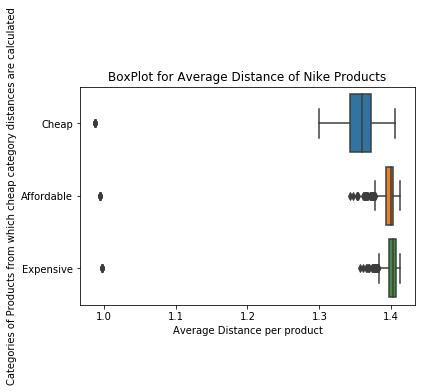

In [89]:
# Plotting a boxplot to visualize the distances of the products of nike

sns.boxplot(x = "Avg_Distance", y = "Category", data = nike_distances)
plt.xlabel("Average Distance per product")
plt.ylabel("Categories of Products from which cheap category distances are calculated")
plt.title("BoxPlot for Average Distance of Nike Products")

#### BOXPLOT FOR PINK PRODUCTS

Text(0.5, 1.0, 'BoxPlot for Average Distance of Pink Products')

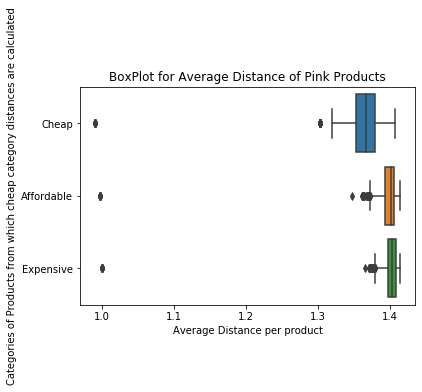

In [90]:
# Plotting a boxplot to visualize the distances of the products of nike

sns.boxplot(x = "Avg_Distance", y = "Category", data = pink_distances)
plt.xlabel("Average Distance per product")
plt.ylabel("Categories of Products from which cheap category distances are calculated")
plt.title("BoxPlot for Average Distance of Pink Products")

#### BOXPLOT FOR VICTORIA'S SECRET PRODUCTS

Text(0.5, 1.0, "BoxPlot for Average Distance of Victoria's Secret Products")

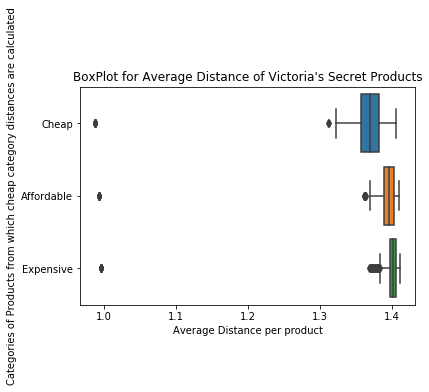

In [91]:
# Plotting a boxplot to visualize the distances of the products of nike

sns.boxplot(x = "Avg_Distance", y = "Category", data = victoria_secret_distances)
plt.xlabel("Average Distance per product")
plt.ylabel("Categories of Products from which cheap category distances are calculated")
plt.title("BoxPlot for Average Distance of Victoria's Secret Products")

#### CONCLUSION:-

1) We can see that the item description's tfidf value based distances separates outr the prices at the brand x product category level. So, product category is an important feature in distinguishing the price of the various products of brands.

#### CHECKING THE SHIPPING VARIABLE'S IMPACT ON THE BRANDS OF NIKE, PINK AND VICTORIA'S SECRET

#### NIKE CHEAP PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS SHIPPING VARIABLE

In [219]:
# Checking the max and the min prices for the cheap products of Nike

print("Minimum Price of Nike Cheap Products is {} ".format(min(cheap_products_df[cheap_products_df["brand_name"] == "Nike"].price.values)))
print("Maximum Price of Nike Cheap Products is {} ".format(max(cheap_products_df[cheap_products_df["brand_name"] == "Nike"].price.values)))

Minimum Price of Nike Cheap Products is 0.0 
Maximum Price of Nike Cheap Products is 10.0 


In [220]:
nike_cheap_products = cheap_products_df[cheap_products_df["brand_name"] == "Nike"]

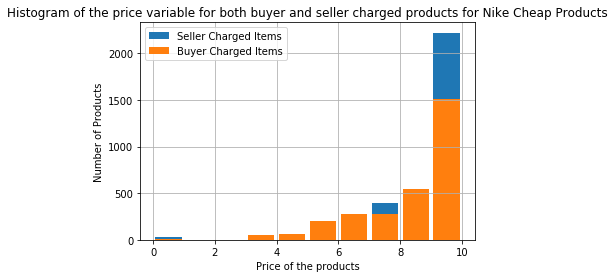

In [221]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = nike_cheap_products[nike_cheap_products['shipping'] == 0].price.values
buyer_charged = nike_cheap_products[nike_cheap_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=10, range = [0,10], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=10, range=[0,10], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Nike Cheap Products")
plt.legend()

#### CONCLUSION:-

1) The higher priced products in cheap category of Nike are paid by the seller than the buyer.

#### NIKE AFFORDABLE PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS SHIPPING VARIABLE

In [222]:
# Checking the max and the min prices for the affordable products of Nike

print("Minimum Price of Nike Affordable Products is {} ".format(min(affordable_products_df[affordable_products_df["brand_name"] == "Nike"].price.values)))
print("Maximum Price of Nike Affordable Products is {} ".format(max(affordable_products_df[affordable_products_df["brand_name"] == "Nike"].price.values)))

Minimum Price of Nike Affordable Products is 11.0 
Maximum Price of Nike Affordable Products is 29.0 


In [223]:
nike_affordable_products = affordable_products_df[affordable_products_df["brand_name"] == "Nike"]

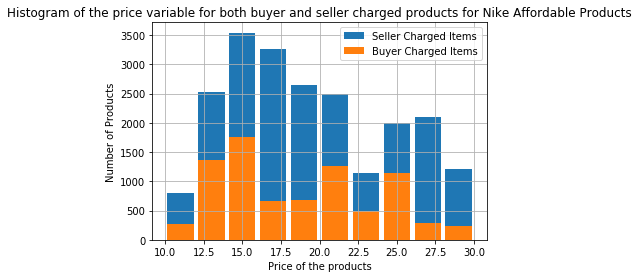

In [224]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = nike_affordable_products[nike_affordable_products['shipping'] == 0].price.values
buyer_charged = nike_affordable_products[nike_affordable_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=10, range = [10,30], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=10, range=[10,30], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Nike Affordable Products")
plt.legend()

#### CONCLUSION:-

1) Shipping charges for all the products in the Nike Affordable Category at all the price points are paid by the seller more than the buyer. 

2) However, the pattern of buyer paid products at all the price points is not distinguishable as the number of products at various price points of this category varies i.e. there are products with higher price points which are higher in numbers than the lower price points products.

#### NIKE EXPENSIVE PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS SHIPPING VARIABLE

In [225]:
# Checking the max and the min prices for the affordable products of Nike

print("Minimum Price of Nike Expensive Products is {} ".format(min(expensive_products_df[expensive_products_df["brand_name"]=="Nike"].price.values)))
print("Maximum Price of Nike Expensive Products is {} ".format(max(expensive_products_df[expensive_products_df["brand_name"]=="Nike"].price.values)))

Minimum Price of Nike Expensive Products is 30.0 
Maximum Price of Nike Expensive Products is 459.0 


In [226]:
nike_expensive_products = expensive_products_df[expensive_products_df["brand_name"]=="Nike"]

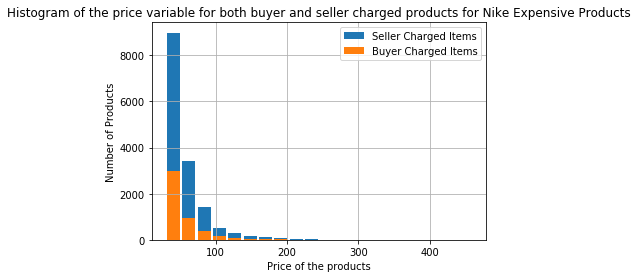

In [227]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = nike_expensive_products[nike_expensive_products['shipping'] == 0].price.values
buyer_charged = nike_expensive_products[nike_expensive_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=20, range = [30,460], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=20, range=[30,460], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Nike Expensive Products")
plt.legend()

#### CONCLUSION:-

All the products for the price points of expensive Nike products are paid more by the seller than the buyer.

#### PINK CHEAP PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS PRICE

In [228]:
# Checking the max and the min prices for the cheap products of Nike

print("Minimum Price of Pink Cheap Products is {} ".format(min(cheap_products_df[cheap_products_df["brand_name"]=="PINK"].price.values)))
print("Maximum Price of Pink Cheap Products is {} ".format(max(cheap_products_df[cheap_products_df["brand_name"]=="PINK"].price.values)))

Minimum Price of Pink Cheap Products is 0.0 
Maximum Price of Pink Cheap Products is 10.0 


In [229]:
pink_cheap_products = cheap_products_df[cheap_products_df["brand_name"]=="PINK"]

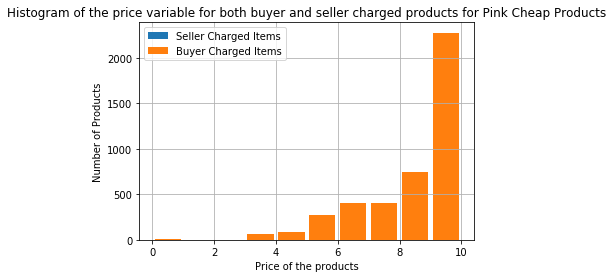

In [230]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = pink_cheap_products[pink_cheap_products['shipping'] == 0].price.values
buyer_charged = pink_cheap_products[pink_cheap_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=10, range = [0,10], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=10, range=[0,10], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Pink Cheap Products")
plt.legend()

#### CONCLUSION:-

1) All the cheap products for all the price points of Pink Brand are paid by the buyer.

#### PINK AFFORDABLE PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS PRICE

In [232]:
# Checking the max and the min prices for the affordable products of Pink

print("Minimum Price of Pink Affordable Products is {} ".format(min(affordable_products_df[affordable_products_df["brand_name"] == "PINK"].price.values)))
print("Maximum Price of Pink Affordable Products is {} ".format(max(affordable_products_df[affordable_products_df["brand_name"] == "PINK"].price.values)))

Minimum Price of Pink Affordable Products is 10.5 
Maximum Price of Pink Affordable Products is 29.0 


In [233]:
pink_affordable_products = affordable_products_df[affordable_products_df["brand_name"] == "PINK"]

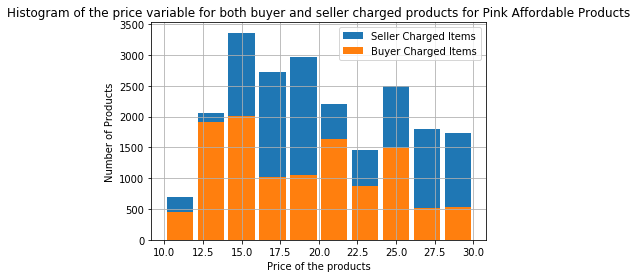

In [234]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = pink_affordable_products[pink_affordable_products['shipping'] == 0].price.values
buyer_charged = pink_affordable_products[pink_affordable_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=10, range = [10,30], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=10, range=[10,30], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Pink Affordable Products")
plt.legend()

#### CONCLUSION:-

We don't see a pattern at various price patterns for buyer and seeler charged items similar to affordable products of Nike.

#### PINK EXPENSIVE PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS PRICE

In [236]:
# Checking the max and the min prices for the cheap products of Nike

print("Minimum Price of Pink Expensive Products is {} ".format(min(expensive_products_df[expensive_products_df["brand_name"]=="PINK"].price.values)))
print("Maximum Price of Pink Expensive Products is {} ".format(max(expensive_products_df[expensive_products_df["brand_name"]=="PINK"].price.values)))

Minimum Price of Pink Expensive Products is 30.0 
Maximum Price of Pink Expensive Products is 798.0 


In [237]:
pink_expensive_products = expensive_products_df[expensive_products_df["brand_name"]=="PINK"]

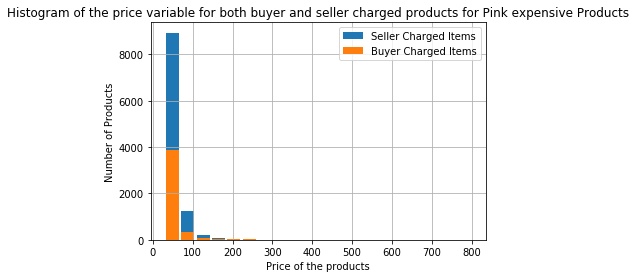

In [239]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = pink_expensive_products[pink_expensive_products['shipping'] == 0].price.values
buyer_charged = pink_expensive_products[pink_expensive_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=20, range = [30,800], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=20, range=[30,800], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Pink expensive Products")
plt.legend()

#### CONCLUSION:-

1) Most of the products lie within the price points between 30 and 100.

2) The shipping is paid by the seller for most of the products in the expensive category of pink.

#### VICTORIA'S SECRET CHEAP PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS PRICE

In [240]:
# Checking the max and the min prices for the cheap products of Nike

print("Minimum Price of Victoria's Secret Cheap Products is {} ".format(min(cheap_products_df[cheap_products_df["brand_name"]=="Victoria's Secret"].price.values)))
print("Maximum Price of Victoria's Secret Cheap Products is {} ".format(max(cheap_products_df[cheap_products_df["brand_name"]=="Victoria's Secret"].price.values)))

Minimum Price of Victoria's Secret Cheap Products is 0.0 
Maximum Price of Victoria's Secret Cheap Products is 10.0 


In [241]:
victoria_cheap_products = cheap_products_df[cheap_products_df["brand_name"]=="Victoria's Secret"]

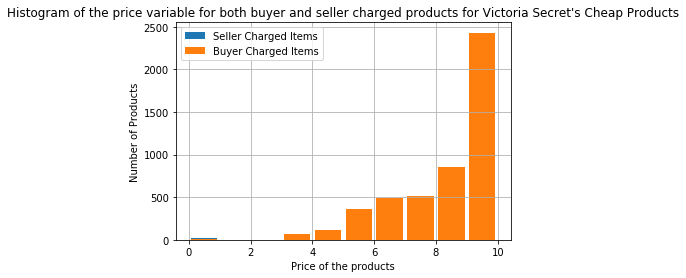

In [242]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = victoria_cheap_products[victoria_cheap_products['shipping'] == 0].price.values
buyer_charged = victoria_cheap_products[victoria_cheap_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=10, range = [0,10], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=10, range=[0,10], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Victoria Secret's Cheap Products")
plt.legend()

#### CONCLUSION:-

Shipping for all the cheap products of Victoria's Secret is paid by the buyer. Similar shipping strategy was adopted for Pink's manufacturer's for it's cheap category.

#### VICTORIA'S SECRET AFFORDABLE PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS PRICE

In [243]:
# Checking the max and the min prices for the cheap products of Nike

print("Minimum Price of Victoria's Secret affordable Products is {} ".format(min(affordable_products_df[affordable_products_df["brand_name"]=="Victoria's Secret"].price.values)))
print("Maximum Price of Victoria's Secret affordable Products is {} ".format(max(affordable_products_df[affordable_products_df["brand_name"]=="Victoria's Secret"].price.values)))

Minimum Price of Victoria's Secret affordable Products is 10.5 
Maximum Price of Victoria's Secret affordable Products is 29.0 


In [244]:
victoria_affordable_products = affordable_products_df[affordable_products_df["brand_name"]=="Victoria's Secret"]

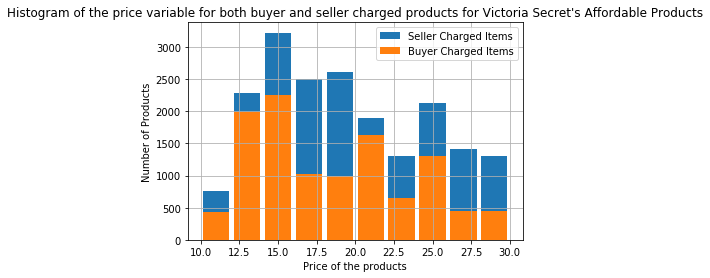

In [245]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = victoria_affordable_products[victoria_affordable_products['shipping'] == 0].price.values
buyer_charged = victoria_affordable_products[victoria_affordable_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=10, range = [10,30], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=10, range=[10,30], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Victoria Secret's Affordable Products")
plt.legend()

#### CONCLUSION:-

There is no clear pattern in this category of products for Victoria's Secret as well, as far as the shipping variable of buyer versus seller charged items are concerned. Similar pattern was observed in the same category of other two brands as well.

#### VICTORIA'S SECRET EXPENSIVE PRODUCTS HISTOGRAM FOR SHIPPING VARIABLE VERSUS PRICE

In [246]:
# Checking the max and the min prices for the cheap products of Nike

print("Minimum Price of Victoria's Secret expensive Products is {} ".format(min(expensive_products_df[expensive_products_df["brand_name"]=="Victoria's Secret"].price.values)))
print("Maximum Price of Victoria's Secret expensive Products is {} ".format(max(expensive_products_df[expensive_products_df["brand_name"]=="Victoria's Secret"].price.values)))

Minimum Price of Victoria's Secret expensive Products is 30.0 
Maximum Price of Victoria's Secret expensive Products is 1400.0 


In [247]:
victoria_expensive_products = expensive_products_df[expensive_products_df["brand_name"]=="Victoria's Secret"]

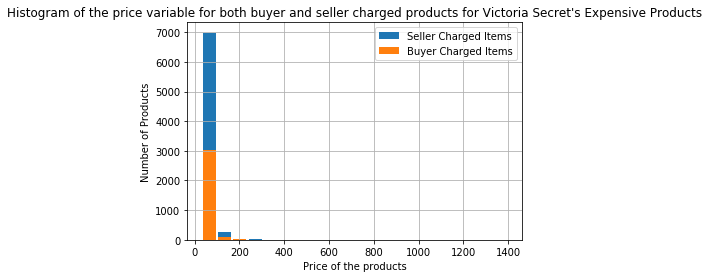

In [248]:
# Getting the array of price of the products with seller charged and buyer charged items
seller_charged = victoria_expensive_products[victoria_expensive_products['shipping'] == 0].price.values
buyer_charged = victoria_expensive_products[victoria_expensive_products['shipping'] == 1].price.values

# Plotting the histograms for the price of the seller charged items and buyer charged items
plt.hist(seller_charged, bins=20, range = [30,1400], rwidth = 0.85, label = 'Seller Charged Items')
plt.hist(buyer_charged, bins=20, range=[30,1400], rwidth = 0.85, label = 'Buyer Charged Items')
plt.grid()
plt.xlabel("Price of the products")
plt.ylabel("Number of Products")
plt.title("Histogram of the price variable for both buyer and seller charged products for Victoria Secret's Expensive Products")
plt.legend()

#### CONCLUSION:-

1) Most of the products lie between the price points of 30 and 200

2) For all the price points, the shipping paid by sellers dominate in this category.

#### CHECKING THE IMPACT OF ITEM_CONDITION ID ON PRICE FOR THESE THREE BRANDS IN THESE THREE CATEGORIES

#### BOXPLOT FOR NIKE CHEAP PRODUCTS

Text(0.5, 1.0, 'Box Plot for Price and Item Condition for Nike Cheap Products')

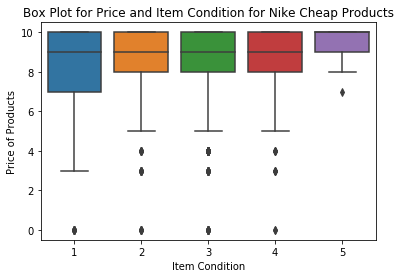

In [252]:
# Nike Cheap Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = nike_cheap_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Nike Cheap Products")

#### BOXPLOT FOR PINK CHEAP PRODUCTS

Text(0.5, 1.0, 'Box Plot for Price and Item Condition for Pink Cheap Products')

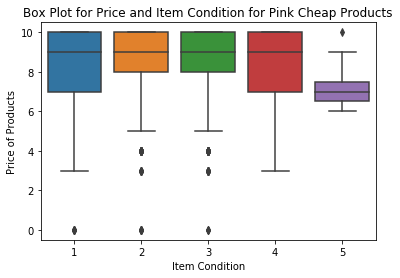

In [255]:
# Pink Cheap Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = pink_cheap_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Pink Cheap Products")

#### BOXPLOT FOR VICTORIA'S SECRET CHEAP PRODUCTS

Text(0.5, 1.0, "Box Plot for Price and Item Condition for Victoria's Secret Cheap Products")

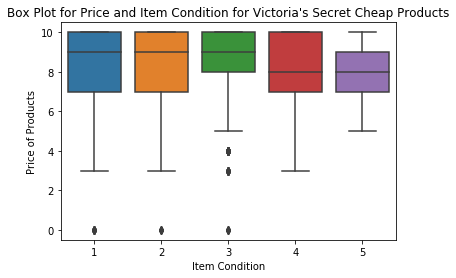

In [258]:
# Victoria's Secret Cheap Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = victoria_cheap_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Victoria's Secret Cheap Products")

#### BOXPLOT FOR NIKE AFFORDABLE PRODUCTS

Text(0.5, 1.0, 'Box Plot for Price and Item Condition for Nike Affordable Products')

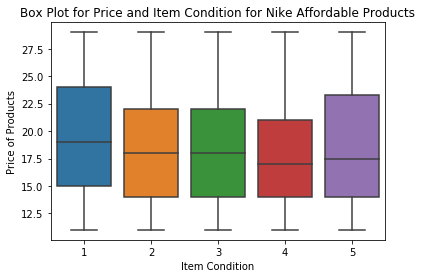

In [253]:
# Nike Affordable Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = nike_affordable_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Nike Affordable Products")

#### BOXPLOT FOR VICTORIA'S SECRET AFFORDABLE PRODUCTS

Text(0.5, 1.0, "Box Plot for Price and Item Condition for  Victoria's Secret Affordable Products")

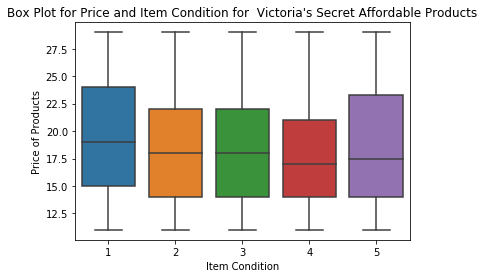

In [259]:
# Victoria's Secret Affordable Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = nike_affordable_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for  Victoria's Secret Affordable Products")

#### BOXPLOT FOR PINK AFFORDABLE PRODUCTS

Text(0.5, 1.0, 'Box Plot for Price and Item Condition for Pink Affordable Products')

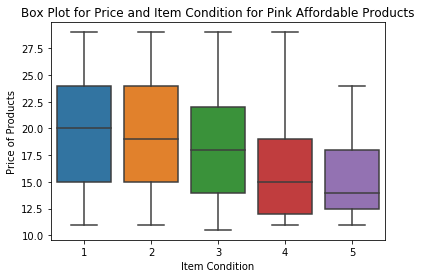

In [256]:
# Pink Affordable Category Products

sns.boxplot(x = "item_condition_id", y = "price", data =pink_affordable_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Pink Affordable Products")

#### BOXPLOT FOR NIKE EXPENSIVE PRODUCTS

Text(0.5, 1.0, 'Box Plot for Price and Item Condition for Nike Expensive Products')

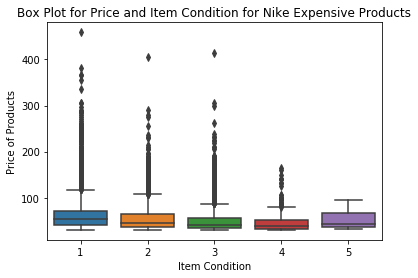

In [254]:
# Nike Expensive Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = nike_expensive_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Nike Expensive Products")

#### BOXPLOT FOR PINK EXPENSIVE PRODUCTS

Text(0.5, 1.0, 'Box Plot for Price and Item Condition for Pink Expensive Products')

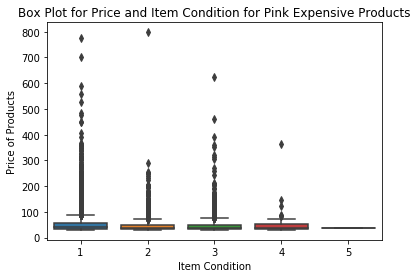

In [257]:
# Pink Expensive Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = pink_expensive_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Pink Expensive Products")

#### BOXPLOT FOR VICTORIA'S SECRET EXPENSIVE PRODUCTS

Text(0.5, 1.0, "Box Plot for Price and Item Condition for Victoria's Secret Expensive Products")

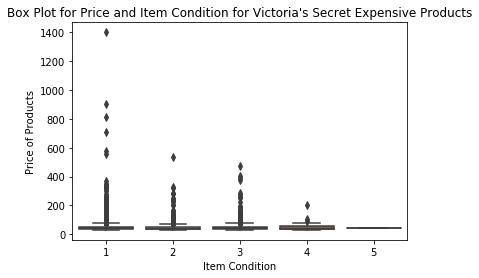

In [260]:
# Victoria's Secret Expensive Category Products

sns.boxplot(x = "item_condition_id", y = "price", data = victoria_expensive_products)
plt.xlabel("Item Condition")
plt.ylabel("Price of Products")
plt.title("Box Plot for Price and Item Condition for Victoria's Secret Expensive Products")

#### CONCLUSION:-

1) For all the 3 brands, the cheap category products have the same median price for all the item conditions execpt for 4 and 5 which have relatively low median price.

2) The median price for the affordable category products for all the three brands decline from item condition id 1 to 5.

3) The median price for the expensive category products also show a similar trend for Nike products. For other 2 brands, the boxplot is not clear enough.

4) In a nutshell, the products with item condition id as 1 would be the best whereas the products with item condition id as 5 would be the worst for all the brands.

#### CORRELATION PLOT BETWEEN NUMERICAL VARIABLES OF THE DATAFRAME

Text(0.5, 1, 'Correlation Matrix for the numerical features')

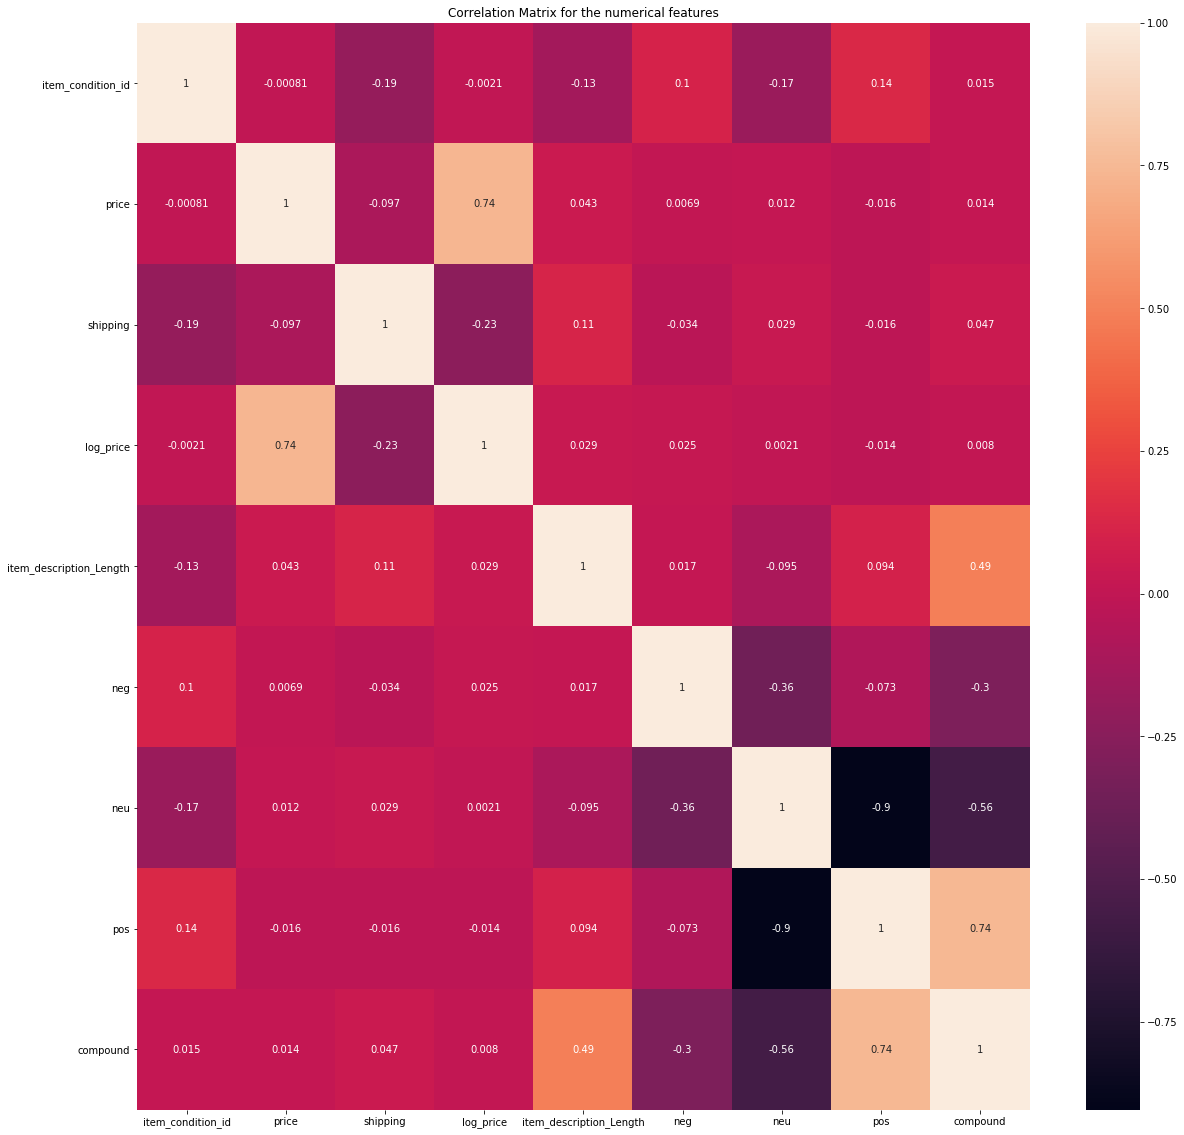

In [114]:
# Defining the correlation matrix

corr = mercari_pricedata.iloc[:,3:].corr()

# Drawing the heatmap
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix for the numerical features")

#### CONCLUSION:-

1) Both the variables price and log_price have a very weak correlation with all other numerical variables. 

2) The categorical variables could have some underlying relation with the price variable which needs to be explored and found out during modelling. 

3) The sentiment scores are also moderately corelated with the response variable which is log_price. 

4) There could be an interaction effect between preprocessed item description and the category and/or brand names.

#### FINAL CONCLUSION:-

<b> 1) We would one hot encod the categories, brand names and the product categories.

2) We would vectorize the preprocessed item description using tfidf vectorizer.

3) The brand vector, the preprocessed item description tfidf vector and the product category vector would be concatenated and would behave as a single feature.

4) The shipping variable and item condition id would be two separate features which would be independent. </b>